# Ada Gjermundsen
# areacella * sftlf = landarea
# NB! Lurt å endre koordinaten til lat og lon i CLM-data til CAM, feks

area = xr.open_dataset("/projects/NS9034K/CMIP6/CMIP/NCC/NorESM2-LM/piControl/r1i1p1f1/fx/areacella/gn/latest/areacella_fx_NorESM2-LM_piControl_r1i1p1f1_gn.nc")
area = guf.consistent_naming(area)
area = area.areacella


lndfrc = xr.open_dataset("/projects/NS9034K/CMIP6/CMIP/NCC/NorESM2-LM/piControl/r1i1p1f1/fx/sftlf/gn/latest/sftlf_fx_NorESM2-LM_piControl_r1i1p1f1_gn.nc")
lndfrc = guf.consistent_naming(lndfrc)
lndarea = 1e-2*lndfrc.sftlf*area

In [2]:
import xarray as xr
import numpy as np
import glob2 as glob
import functions
import matplotlib.pyplot as plt

In [2]:
rpath = '/nird/projects/NS9600K/astridbg/arctic-cld-feedbacks/data/land_vars/'
ds_piClim = xr.open_dataset(rpath+'N1850_f19_tn14_noresm2_3_slf_output_20250529.clm2.concatfiles.nc')
ds_0_5xCO2 = xr.open_dataset(rpath+'N1850_f19_tn14_noresm2_3_slf_output_0_5xCO2_20250529.clm2.concatfiles.nc')
ds_2xCO2 = xr.open_dataset(rpath+'N1850_f19_tn14_noresm2_3_slf_output_2xCO2_20250529.clm2.concatfiles.nc')
ds_4xCO2 = xr.open_dataset(rpath+'N1850_f19_tn14_noresm2_3_slf_output_4xCO2_20250529.clm2.concatfiles.nc')

In [ ]:
# Fix time stamp
ds_piClim = functions.fix_clm_time(ds_piClim)
ds_2xCO2 = functions.fix_clm_time(ds_2xCO2)
ds_4xCO2 = functions.fix_clm_time(ds_4xCO2)
ds_0_5xCO2 = functions.fix_clm_time(ds_0_5xCO2)
print(ds_0_5xCO2.data_vars)

Data variables:
    time_bounds     (time, hist_interval) object 29kB ...
    area            (lat, lon) float64 111kB ...
    QSOIL           (time, lat, lon) float64 199MB ...
    SOILWATER_10CM  (time, lat, lon) float64 199MB ...
    TOTSOILICE      (time, lat, lon) float64 199MB ...
    TOTSOILLIQ      (time, lat, lon) float64 199MB ...
    QFLX_EVAP_TOT   (time, lat, lon) float64 199MB ...
    QH2OSFC         (time, lat, lon) float64 199MB ...
    RAIN_FROM_ATM   (time, lat, lon) float64 199MB ...


In [6]:
rpath = '/nird/projects/NS9600K/astridbg/arctic-cld-feedbacks/data/'
ds_piClim_xtra = xr.open_dataset(rpath+'N1850_f19_tn14_noresm2_3_slf_output_20250529.clm2.concatfiles.nc')
ds_0_5xCO2_xtra = xr.open_dataset(rpath+'N1850_f19_tn14_noresm2_3_slf_output_0_5xCO2_20250529.clm2.concatfiles.nc')
ds_2xCO2_xtra = xr.open_dataset(rpath+'N1850_f19_tn14_noresm2_3_slf_output_2xCO2_20250529.clm2.concatfiles.nc')
ds_4xCO2_xtra = xr.open_dataset(rpath+'N1850_f19_tn14_noresm2_3_slf_output_4xCO2_20250529.clm2.concatfiles.nc')

In [7]:
# Fix time stamp
ds_piClim_xtra = functions.fix_clm_time(ds_piClim_xtra)
ds_2xCO2_xtra = functions.fix_clm_time(ds_2xCO2_xtra)
ds_4xCO2_xtra = functions.fix_clm_time(ds_4xCO2_xtra)
print(ds_piClim_xtra.data_vars)

Data variables:
    time_bounds     (time, hist_interval) object 29kB ...
    area            (lat, lon) float64 111kB ...
    QSOIL           (time, lat, lon) float64 199MB ...
    SOILWATER_10CM  (time, lat, lon) float64 199MB ...
    TOTSOILICE      (time, lat, lon) float64 199MB ...
    TOTSOILLIQ      (time, lat, lon) float64 199MB ...


In [3]:
rpath = '/nird/projects/NS9600K/astridbg/arctic-cld-feedbacks/data/land_vars/'
ds_piClim = xr.open_dataset(rpath+'all_land_vars_piClim.nc')
ds_2xCO2 = xr.open_dataset(rpath+'all_land_vars_2xCO2.nc')
ds_4xCO2 = xr.open_dataset(rpath+'all_land_vars_4xCO2.nc')

In [4]:
# Create new variables
ds_list = [ds_piClim, ds_2xCO2, ds_4xCO2]
for ds in ds_list:
    ds['QFLX_EVAP_PLANTS'] = ds['QVEGE'] + ds['QVEGT']
    ds['QFLX_EVAP_TOT_calc'] = ds['QSOIL'] + ds['QVEGE'] + ds['QVEGT']
    ds['QFLX_EVAP_diff_calc'] = ds['QFLX_EVAP_TOT'] - ds['QFLX_EVAP_TOT_calc']

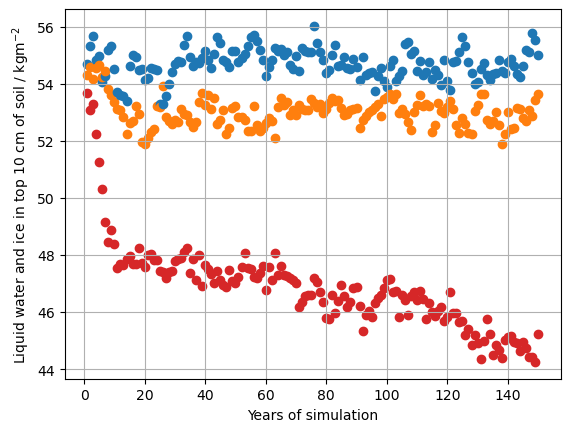

In [5]:
# Make a spatial average
Arctic_lim = 60
var = 'SOILWATER_10CM'
area_weights = ds_piClim['area'].sel(lat=slice(Arctic_lim,90))/ds_piClim['area'].sel(lat=slice(Arctic_lim,90)).sum()
piClim_Arctic = ds_piClim[var].sel(lat=slice(Arctic_lim,90))
Arctic_2xCO2 = ds_2xCO2[var].sel(lat=slice(Arctic_lim,90))
Arctic_4xCO2 = ds_4xCO2[var].sel(lat=slice(Arctic_lim,90))

annual_piClim = piClim_Arctic.groupby('time.year').mean('time')
annual_2xCO2 = Arctic_2xCO2.groupby('time.year').mean('time')
annual_4xCO2 = Arctic_4xCO2.groupby('time.year').mean('time')

import matplotlib.pyplot as plt
for i in range(len(annual_piClim.year)):
    plt.scatter(1+i, (annual_piClim.isel(year=i)*area_weights).sum(), color='tab:blue')
    plt.scatter(1+i, (annual_2xCO2.isel(year=i)*area_weights).sum(), color='tab:orange')
    plt.scatter(1+i, (annual_4xCO2.isel(year=i)*area_weights).sum(), color='tab:red')
plt.grid()
plt.xlabel('Years of simulation')
plt.ylabel('Liquid water and ice in top 10 cm of soil / kgm$^{-2}$')
plt.show()

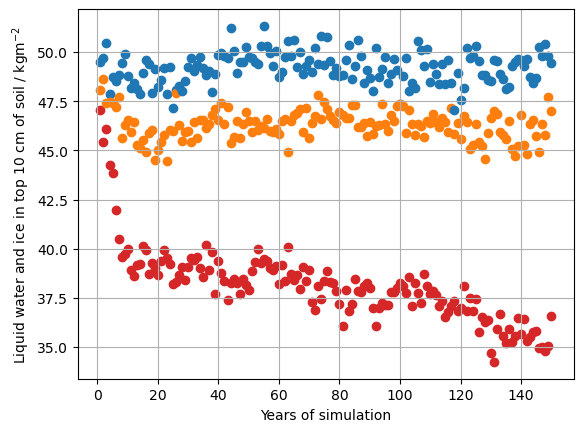

In [86]:
# Make a spatial average
Arctic_lim = 60
var = 'SOILWATER_10CM'
season = 'JJA'

# Choose area
area_weights = ds_piClim['area'].sel(lat=slice(Arctic_lim,90))/ds_piClim['area'].sel(lat=slice(Arctic_lim,90)).sum()
ds_piClim_i = ds_piClim.sel(lat=slice(Arctic_lim,90))
ds_2xCO2_i = ds_2xCO2.sel(lat=slice(Arctic_lim,90))
ds_4xCO2_i = ds_4xCO2.sel(lat=slice(Arctic_lim,90))


# Seasonal averages
ds_piClim_season = ds_piClim_i.sel(time=ds_piClim_i.time.dt.season==season)
ds_piClim_i = ds_piClim_season.groupby(ds_piClim_season.time.dt.year).mean('time')

ds_2xCO2_season = ds_2xCO2_i.sel(time=ds_2xCO2_i.time.dt.season==season)
ds_2xCO2_i = ds_2xCO2_season.groupby(ds_2xCO2_season.time.dt.year).mean('time')

ds_4xCO2_season = ds_4xCO2_i.sel(time=ds_4xCO2_i.time.dt.season==season)
ds_4xCO2_i = ds_4xCO2_season.groupby(ds_4xCO2_season.time.dt.year).mean('time')

import matplotlib.pyplot as plt
for i in range(len(annual_piClim.year)):
    plt.scatter(1+i, (ds_piClim_i[var].isel(year=i)*area_weights).sum(), color='tab:blue')
    plt.scatter(1+i, (ds_2xCO2_i[var].isel(year=i)*area_weights).sum(), color='tab:orange')
    plt.scatter(1+i, (ds_4xCO2_i[var].isel(year=i)*area_weights).sum(), color='tab:red')
plt.grid()
plt.xlabel('Years of simulation')
plt.ylabel('Liquid water and ice in top 10 cm of soil / kgm$^{-2}$')
plt.show()

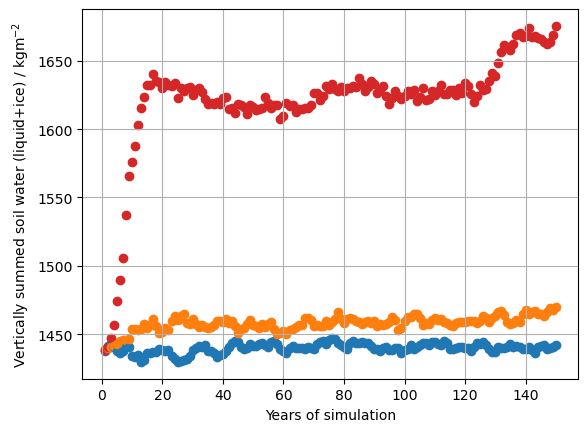

In [53]:
Arctic_lim = 60
var = 'TOTSOILLIQ'
# Choose area
area_weights = ds_piClim['area'].sel(lat=slice(Arctic_lim,90))/ds_piClim['area'].sel(lat=slice(Arctic_lim,90)).sum()
ds_piClim_i = ds_piClim.sel(lat=slice(Arctic_lim,90))
ds_2xCO2_i = ds_2xCO2.sel(lat=slice(Arctic_lim,90))
ds_4xCO2_i = ds_4xCO2.sel(lat=slice(Arctic_lim,90))

# Annual average
ds_piClim_i = ds_piClim_i.groupby('time.year').mean('time')
ds_2xCO2_i = ds_2xCO2_i.groupby('time.year').mean('time')
ds_4xCO2_i = ds_4xCO2_i.groupby('time.year').mean('time')


import matplotlib.pyplot as plt
for i in range(len(annual_piClim.year)):
    plt.scatter(1+i, (ds_piClim_i['TOTSOILLIQ'].isel(year=i)*area_weights).sum() + (ds_piClim_i['TOTSOILICE'].isel(year=i)*area_weights).sum(), color='tab:blue')
    plt.scatter(1+i, (ds_2xCO2_i['TOTSOILLIQ'].isel(year=i)*area_weights).sum() + (ds_2xCO2_i['TOTSOILICE'].isel(year=i)*area_weights).sum(), color='tab:orange')
    plt.scatter(1+i, (ds_4xCO2_i['TOTSOILLIQ'].isel(year=i)*area_weights).sum() + (ds_4xCO2_i['TOTSOILICE'].isel(year=i)*area_weights).sum(), color='tab:red')
plt.grid()
plt.xlabel('Years of simulation')
plt.ylabel('Vertically summed soil water (liquid+ice) / kgm$^{-2}$')
plt.show()

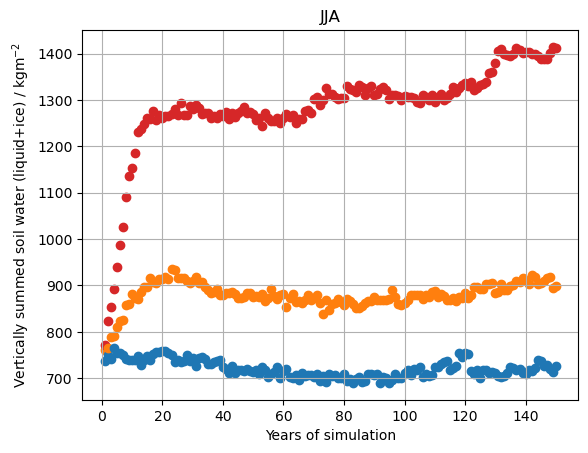

In [ ]:
# Make a spatial average
Arctic_lim = 60
var = 'TOTSOILLIQ'
season = 'JJA'

# Choose area
area_weights = ds_piClim['area'].sel(lat=slice(Arctic_lim,90))/ds_piClim['area'].sel(lat=slice(Arctic_lim,90)).sum()
ds_piClim_i = ds_piClim.sel(lat=slice(Arctic_lim,90))
ds_2xCO2_i = ds_2xCO2.sel(lat=slice(Arctic_lim,90))
ds_4xCO2_i = ds_4xCO2.sel(lat=slice(Arctic_lim,90))


# Seasonal averages
ds_piClim_season = ds_piClim_i.sel(time=ds_piClim_i.time.dt.season==season)
ds_piClim_i = ds_piClim_season.groupby(ds_piClim_season.time.dt.year).mean('time')

ds_2xCO2_season = ds_2xCO2_i.sel(time=ds_2xCO2_i.time.dt.season==season)
ds_2xCO2_i = ds_2xCO2_season.groupby(ds_2xCO2_season.time.dt.year).mean('time')

ds_4xCO2_season = ds_4xCO2_i.sel(time=ds_4xCO2_i.time.dt.season==season)
ds_4xCO2_i = ds_4xCO2_season.groupby(ds_4xCO2_season.time.dt.year).mean('time')

import matplotlib.pyplot as plt
for i in range(len(annual_piClim.year)):
    plt.scatter(1+i, (ds_piClim_i[var].isel(year=i)*area_weights).sum(), color='tab:blue')
    plt.scatter(1+i, (ds_2xCO2_i[var].isel(year=i)*area_weights).sum(), color='tab:orange')
    plt.scatter(1+i, (ds_4xCO2_i[var].isel(year=i)*area_weights).sum(), color='tab:red')
plt.grid()
plt.xlabel('Years of simulation')
plt.ylabel('Vertically summed soil liquid water/ kgm$^{-2}$')
plt.title(season)
plt.show()

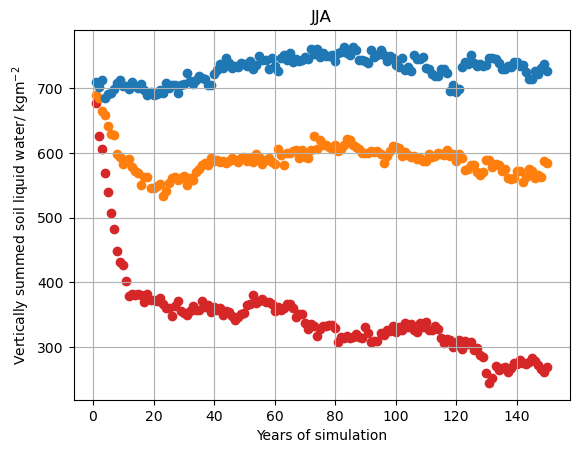

In [62]:
# Make a spatial average
Arctic_lim = 60
var = 'TOTSOILICE'
season = 'JJA'

# Choose area
area_weights = ds_piClim['area'].sel(lat=slice(Arctic_lim,90))/ds_piClim['area'].sel(lat=slice(Arctic_lim,90)).sum()
ds_piClim_i = ds_piClim.sel(lat=slice(Arctic_lim,90))
ds_2xCO2_i = ds_2xCO2.sel(lat=slice(Arctic_lim,90))
ds_4xCO2_i = ds_4xCO2.sel(lat=slice(Arctic_lim,90))


# Seasonal averages
ds_piClim_season = ds_piClim_i.sel(time=ds_piClim_i.time.dt.season==season)
ds_piClim_i = ds_piClim_season.groupby(ds_piClim_season.time.dt.year).mean('time')

ds_2xCO2_season = ds_2xCO2_i.sel(time=ds_2xCO2_i.time.dt.season==season)
ds_2xCO2_i = ds_2xCO2_season.groupby(ds_2xCO2_season.time.dt.year).mean('time')

ds_4xCO2_season = ds_4xCO2_i.sel(time=ds_4xCO2_i.time.dt.season==season)
ds_4xCO2_i = ds_4xCO2_season.groupby(ds_4xCO2_season.time.dt.year).mean('time')

import matplotlib.pyplot as plt
for i in range(len(annual_piClim.year)):
    plt.scatter(1+i, (ds_piClim_i[var].isel(year=i)*area_weights).sum(), color='tab:blue')
    plt.scatter(1+i, (ds_2xCO2_i[var].isel(year=i)*area_weights).sum(), color='tab:orange')
    plt.scatter(1+i, (ds_4xCO2_i[var].isel(year=i)*area_weights).sum(), color='tab:red')
plt.grid()
plt.xlabel('Years of simulation')
plt.ylabel('Vertically summed soil ice/ kgm$^{-2}$')
plt.title(season)
plt.show()

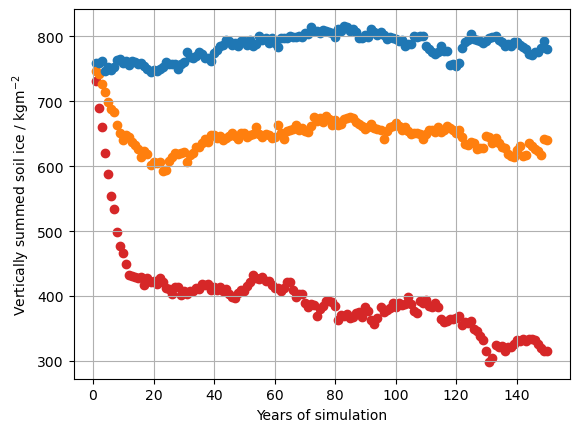

In [45]:
Arctic_lim = 60
var = 'TOTSOILICE'
area_weights = ds_piClim['area'].sel(lat=slice(Arctic_lim,90))/ds_piClim['area'].sel(lat=slice(Arctic_lim,90)).sum()
piClim_Arctic = ds_piClim[var].sel(lat=slice(Arctic_lim,90))
Arctic_2xCO2 = ds_2xCO2[var].sel(lat=slice(Arctic_lim,90))
Arctic_4xCO2 = ds_4xCO2[var].sel(lat=slice(Arctic_lim,90))

annual_piClim = piClim_Arctic.groupby('time.year').mean('time')
annual_2xCO2 = Arctic_2xCO2.groupby('time.year').mean('time')
annual_4xCO2 = Arctic_4xCO2.groupby('time.year').mean('time')

import matplotlib.pyplot as plt
for i in range(len(annual_piClim.year)):
    plt.scatter(1+i, (annual_piClim.isel(year=i)*area_weights).sum(), color='tab:blue')
    plt.scatter(1+i, (annual_2xCO2.isel(year=i)*area_weights).sum(), color='tab:orange')
    plt.scatter(1+i, (annual_4xCO2.isel(year=i)*area_weights).sum(), color='tab:red')
plt.grid()
plt.xlabel('Years of simulation')
plt.ylabel('Vertically summed soil ice / kgm$^{-2}$')
plt.show()

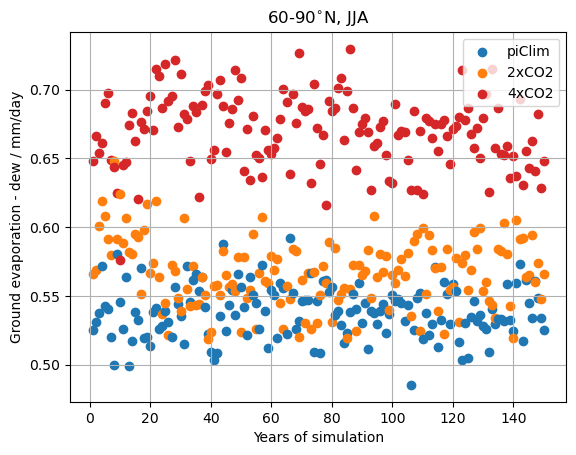

In [29]:
# Make a spatial average
Arctic_lim = 60
var = 'QSOIL'
season = 'JJA'

# Choose area
area_weights = ds_piClim['area'].sel(lat=slice(Arctic_lim,90))/ds_piClim['area'].sel(lat=slice(Arctic_lim,90)).sum()
ds_piClim_i = ds_piClim.sel(lat=slice(Arctic_lim,90))
ds_2xCO2_i = ds_2xCO2.sel(lat=slice(Arctic_lim,90))
ds_4xCO2_i = ds_4xCO2.sel(lat=slice(Arctic_lim,90))


# Seasonal averages
ds_piClim_season = ds_piClim_i.sel(time=ds_piClim_i.time.dt.season==season)
ds_piClim_i = ds_piClim_season.groupby(ds_piClim_season.time.dt.year).mean('time')

ds_2xCO2_season = ds_2xCO2_i.sel(time=ds_2xCO2_i.time.dt.season==season)
ds_2xCO2_i = ds_2xCO2_season.groupby(ds_2xCO2_season.time.dt.year).mean('time')

ds_4xCO2_season = ds_4xCO2_i.sel(time=ds_4xCO2_i.time.dt.season==season)
ds_4xCO2_i = ds_4xCO2_season.groupby(ds_4xCO2_season.time.dt.year).mean('time')

import matplotlib.pyplot as plt
plt.scatter(1, (ds_piClim_i[var].isel(year=i)*area_weights).sum()*60*60*24, color='tab:blue', label='piClim')
plt.scatter(1, (ds_2xCO2_i[var].isel(year=i)*area_weights).sum()*60*60*24, color='tab:orange', label='2xCO2')
plt.scatter(1, (ds_4xCO2_i[var].isel(year=i)*area_weights).sum()*60*60*24, color='tab:red', label='4xCO2')

for i in range(1, len(ds_piClim_i.year)):
    plt.scatter(1+i, (ds_piClim_i[var].isel(year=i)*area_weights).sum()*60*60*24, color='tab:blue')
    plt.scatter(1+i, (ds_2xCO2_i[var].isel(year=i)*area_weights).sum()*60*60*24, color='tab:orange')
    plt.scatter(1+i, (ds_4xCO2_i[var].isel(year=i)*area_weights).sum()*60*60*24, color='tab:red')
plt.grid()
plt.legend()
plt.xlabel('Years of simulation')
plt.ylabel('Ground evaporation - dew / mm/day')
plt.title(str(Arctic_lim)+'-90$^{\circ}$N, '+season)
plt.show()

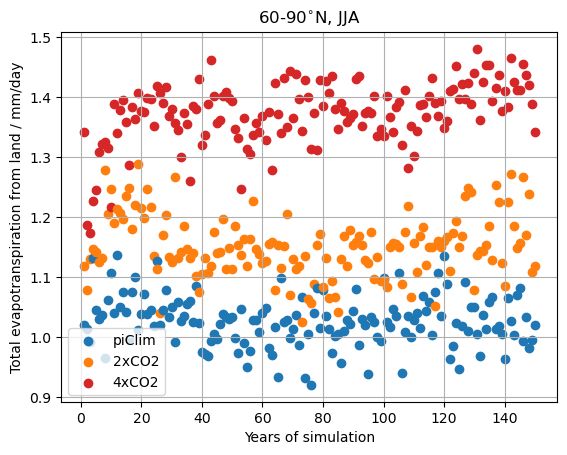

In [28]:
# Make a spatial average
Arctic_lim = 60
var = 'QFLX_EVAP_TOT'
season = 'JJA'

# Choose area
area_weights = ds_piClim['area'].sel(lat=slice(Arctic_lim,90))/ds_piClim['area'].sel(lat=slice(Arctic_lim,90)).sum()
ds_piClim_i = ds_piClim.sel(lat=slice(Arctic_lim,90))
ds_2xCO2_i = ds_2xCO2.sel(lat=slice(Arctic_lim,90))
ds_4xCO2_i = ds_4xCO2.sel(lat=slice(Arctic_lim,90))


# Seasonal averages
ds_piClim_season = ds_piClim_i.sel(time=ds_piClim_i.time.dt.season==season)
ds_piClim_i = ds_piClim_season.groupby(ds_piClim_season.time.dt.year).mean('time')

ds_2xCO2_season = ds_2xCO2_i.sel(time=ds_2xCO2_i.time.dt.season==season)
ds_2xCO2_i = ds_2xCO2_season.groupby(ds_2xCO2_season.time.dt.year).mean('time')

ds_4xCO2_season = ds_4xCO2_i.sel(time=ds_4xCO2_i.time.dt.season==season)
ds_4xCO2_i = ds_4xCO2_season.groupby(ds_4xCO2_season.time.dt.year).mean('time')

import matplotlib.pyplot as plt
plt.scatter(1, (ds_piClim_i[var].isel(year=i)*area_weights).sum()*60*60*24, color='tab:blue', label='piClim')
plt.scatter(1, (ds_2xCO2_i[var].isel(year=i)*area_weights).sum()*60*60*24, color='tab:orange', label='2xCO2')
plt.scatter(1, (ds_4xCO2_i[var].isel(year=i)*area_weights).sum()*60*60*24, color='tab:red', label='4xCO2')

for i in range(1, len(ds_piClim_i.year)):
    plt.scatter(1+i, (ds_piClim_i[var].isel(year=i)*area_weights).sum()*60*60*24, color='tab:blue')
    plt.scatter(1+i, (ds_2xCO2_i[var].isel(year=i)*area_weights).sum()*60*60*24, color='tab:orange')
    plt.scatter(1+i, (ds_4xCO2_i[var].isel(year=i)*area_weights).sum()*60*60*24, color='tab:red')
plt.grid()
plt.legend()
plt.xlabel('Years of simulation')
plt.ylabel('Total evapotranspiration from land / mm/day')
plt.title(str(Arctic_lim)+'-90$^{\circ}$N, '+season)
plt.show()

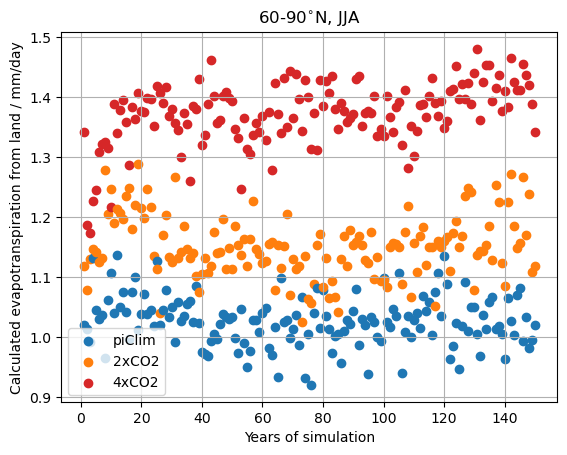

In [32]:
# Make a spatial average
Arctic_lim = 60
var = 'QFLX_EVAP_TOT_calc'
season = 'JJA'

# Choose area
area_weights = ds_piClim['area'].sel(lat=slice(Arctic_lim,90))/ds_piClim['area'].sel(lat=slice(Arctic_lim,90)).sum()
ds_piClim_i = ds_piClim.sel(lat=slice(Arctic_lim,90))
ds_2xCO2_i = ds_2xCO2.sel(lat=slice(Arctic_lim,90))
ds_4xCO2_i = ds_4xCO2.sel(lat=slice(Arctic_lim,90))


# Seasonal averages
ds_piClim_season = ds_piClim_i.sel(time=ds_piClim_i.time.dt.season==season)
ds_piClim_i = ds_piClim_season.groupby(ds_piClim_season.time.dt.year).mean('time')

ds_2xCO2_season = ds_2xCO2_i.sel(time=ds_2xCO2_i.time.dt.season==season)
ds_2xCO2_i = ds_2xCO2_season.groupby(ds_2xCO2_season.time.dt.year).mean('time')

ds_4xCO2_season = ds_4xCO2_i.sel(time=ds_4xCO2_i.time.dt.season==season)
ds_4xCO2_i = ds_4xCO2_season.groupby(ds_4xCO2_season.time.dt.year).mean('time')

import matplotlib.pyplot as plt
plt.scatter(1, (ds_piClim_i[var].isel(year=i)*area_weights).sum()*60*60*24, color='tab:blue', label='piClim')
plt.scatter(1, (ds_2xCO2_i[var].isel(year=i)*area_weights).sum()*60*60*24, color='tab:orange', label='2xCO2')
plt.scatter(1, (ds_4xCO2_i[var].isel(year=i)*area_weights).sum()*60*60*24, color='tab:red', label='4xCO2')

for i in range(1, len(ds_piClim_i.year)):
    plt.scatter(1+i, (ds_piClim_i[var].isel(year=i)*area_weights).sum()*60*60*24, color='tab:blue')
    plt.scatter(1+i, (ds_2xCO2_i[var].isel(year=i)*area_weights).sum()*60*60*24, color='tab:orange')
    plt.scatter(1+i, (ds_4xCO2_i[var].isel(year=i)*area_weights).sum()*60*60*24, color='tab:red')
plt.grid()
plt.legend()
plt.xlabel('Years of simulation')
plt.ylabel('Calculated evapotranspiration from land / mm/day')
plt.title(str(Arctic_lim)+'-90$^{\circ}$N, '+season)
plt.show()

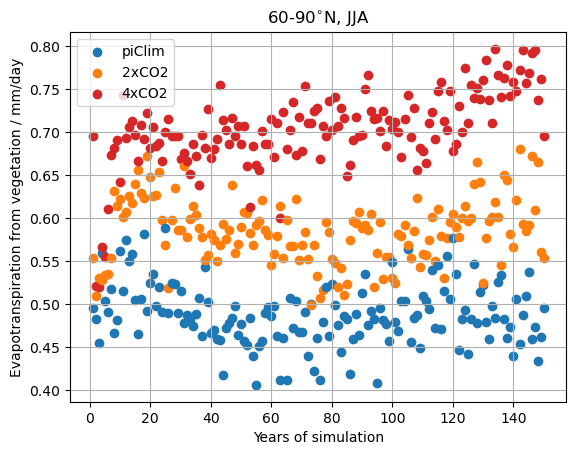

In [33]:
# Make a spatial average
Arctic_lim = 60
var = 'QFLX_EVAP_PLANTS'
season = 'JJA'

# Choose area
area_weights = ds_piClim['area'].sel(lat=slice(Arctic_lim,90))/ds_piClim['area'].sel(lat=slice(Arctic_lim,90)).sum()
ds_piClim_i = ds_piClim.sel(lat=slice(Arctic_lim,90))
ds_2xCO2_i = ds_2xCO2.sel(lat=slice(Arctic_lim,90))
ds_4xCO2_i = ds_4xCO2.sel(lat=slice(Arctic_lim,90))


# Seasonal averages
ds_piClim_season = ds_piClim_i.sel(time=ds_piClim_i.time.dt.season==season)
ds_piClim_i = ds_piClim_season.groupby(ds_piClim_season.time.dt.year).mean('time')

ds_2xCO2_season = ds_2xCO2_i.sel(time=ds_2xCO2_i.time.dt.season==season)
ds_2xCO2_i = ds_2xCO2_season.groupby(ds_2xCO2_season.time.dt.year).mean('time')

ds_4xCO2_season = ds_4xCO2_i.sel(time=ds_4xCO2_i.time.dt.season==season)
ds_4xCO2_i = ds_4xCO2_season.groupby(ds_4xCO2_season.time.dt.year).mean('time')

import matplotlib.pyplot as plt
plt.scatter(1, (ds_piClim_i[var].isel(year=i)*area_weights).sum()*60*60*24, color='tab:blue', label='piClim')
plt.scatter(1, (ds_2xCO2_i[var].isel(year=i)*area_weights).sum()*60*60*24, color='tab:orange', label='2xCO2')
plt.scatter(1, (ds_4xCO2_i[var].isel(year=i)*area_weights).sum()*60*60*24, color='tab:red', label='4xCO2')

for i in range(1, len(ds_piClim_i.year)):
    plt.scatter(1+i, (ds_piClim_i[var].isel(year=i)*area_weights).sum()*60*60*24, color='tab:blue')
    plt.scatter(1+i, (ds_2xCO2_i[var].isel(year=i)*area_weights).sum()*60*60*24, color='tab:orange')
    plt.scatter(1+i, (ds_4xCO2_i[var].isel(year=i)*area_weights).sum()*60*60*24, color='tab:red')
plt.grid()
plt.legend()
plt.xlabel('Years of simulation')
plt.ylabel('Evapotranspiration from vegetation / mm/day')
plt.title(str(Arctic_lim)+'-90$^{\circ}$N, '+season)
plt.show()

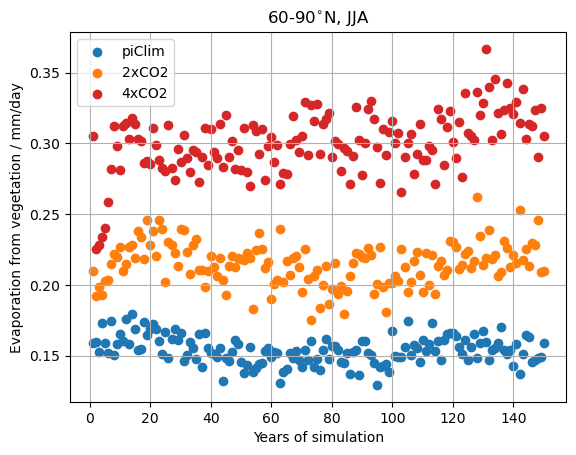

In [30]:
# Make a spatial average
Arctic_lim = 60
var = 'QVEGE'
season = 'JJA'

# Choose area
area_weights = ds_piClim['area'].sel(lat=slice(Arctic_lim,90))/(ds_piClim['area'].sel(lat=slice(Arctic_lim,90)).sum())
ds_piClim_i = ds_piClim.sel(lat=slice(Arctic_lim,90))
ds_2xCO2_i = ds_2xCO2.sel(lat=slice(Arctic_lim,90))
ds_4xCO2_i = ds_4xCO2.sel(lat=slice(Arctic_lim,90))


# Seasonal averages
ds_piClim_season = ds_piClim_i.sel(time=ds_piClim_i.time.dt.season==season)
ds_piClim_i = ds_piClim_season.groupby(ds_piClim_season.time.dt.year).mean('time')

ds_2xCO2_season = ds_2xCO2_i.sel(time=ds_2xCO2_i.time.dt.season==season)
ds_2xCO2_i = ds_2xCO2_season.groupby(ds_2xCO2_season.time.dt.year).mean('time')

ds_4xCO2_season = ds_4xCO2_i.sel(time=ds_4xCO2_i.time.dt.season==season)
ds_4xCO2_i = ds_4xCO2_season.groupby(ds_4xCO2_season.time.dt.year).mean('time')

import matplotlib.pyplot as plt

plt.scatter(1, (ds_piClim_i[var].isel(year=i)*area_weights).sum()*60*60*24, color='tab:blue', label='piClim')
plt.scatter(1, (ds_2xCO2_i[var].isel(year=i)*area_weights).sum()*60*60*24, color='tab:orange', label='2xCO2')
plt.scatter(1, (ds_4xCO2_i[var].isel(year=i)*area_weights).sum()*60*60*24, color='tab:red', label='4xCO2')

for i in range(1, len(ds_piClim_i.year)):
    plt.scatter(1+i, (ds_piClim_i[var].isel(year=i)*area_weights).sum()*60*60*24, color='tab:blue')
    plt.scatter(1+i, (ds_2xCO2_i[var].isel(year=i)*area_weights).sum()*60*60*24, color='tab:orange')
    plt.scatter(1+i, (ds_4xCO2_i[var].isel(year=i)*area_weights).sum()*60*60*24, color='tab:red')
plt.grid()
plt.legend()
plt.xlabel('Years of simulation')
plt.ylabel('Evaporation from vegetation / mm/day')
plt.title(str(Arctic_lim)+'-90$^{\circ}$N, '+season)
plt.show()

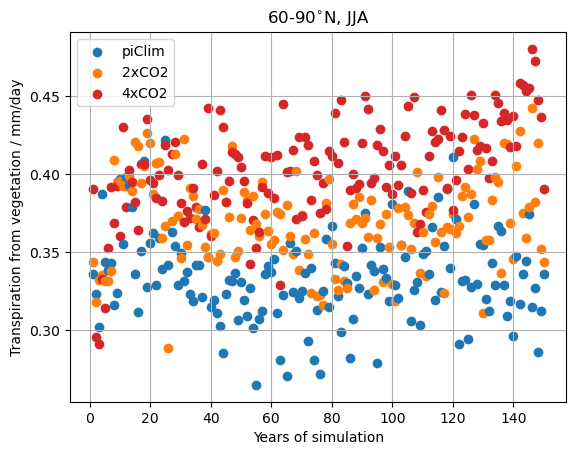

In [31]:
# Make a spatial average
Arctic_lim = 60
var = 'QVEGT'
season = 'JJA'

# Choose area
area_weights = ds_piClim['area'].sel(lat=slice(Arctic_lim,90))/(ds_piClim['area'].sel(lat=slice(Arctic_lim,90)).sum())
ds_piClim_i = ds_piClim.sel(lat=slice(Arctic_lim,90))
ds_2xCO2_i = ds_2xCO2.sel(lat=slice(Arctic_lim,90))
ds_4xCO2_i = ds_4xCO2.sel(lat=slice(Arctic_lim,90))


# Seasonal averages
ds_piClim_season = ds_piClim_i.sel(time=ds_piClim_i.time.dt.season==season)
ds_piClim_i = ds_piClim_season.groupby(ds_piClim_season.time.dt.year).mean('time')

ds_2xCO2_season = ds_2xCO2_i.sel(time=ds_2xCO2_i.time.dt.season==season)
ds_2xCO2_i = ds_2xCO2_season.groupby(ds_2xCO2_season.time.dt.year).mean('time')

ds_4xCO2_season = ds_4xCO2_i.sel(time=ds_4xCO2_i.time.dt.season==season)
ds_4xCO2_i = ds_4xCO2_season.groupby(ds_4xCO2_season.time.dt.year).mean('time')

import matplotlib.pyplot as plt

plt.scatter(1, (ds_piClim_i[var].isel(year=i)*area_weights).sum()*60*60*24, color='tab:blue', label='piClim')
plt.scatter(1, (ds_2xCO2_i[var].isel(year=i)*area_weights).sum()*60*60*24, color='tab:orange', label='2xCO2')
plt.scatter(1, (ds_4xCO2_i[var].isel(year=i)*area_weights).sum()*60*60*24, color='tab:red', label='4xCO2')

for i in range(1, len(ds_piClim_i.year)):
    plt.scatter(1+i, (ds_piClim_i[var].isel(year=i)*area_weights).sum()*60*60*24, color='tab:blue')
    plt.scatter(1+i, (ds_2xCO2_i[var].isel(year=i)*area_weights).sum()*60*60*24, color='tab:orange')
    plt.scatter(1+i, (ds_4xCO2_i[var].isel(year=i)*area_weights).sum()*60*60*24, color='tab:red')
plt.grid()
plt.legend()
plt.xlabel('Years of simulation')
plt.ylabel('Transpiration from vegetation / mm/day')
plt.title(str(Arctic_lim)+'-90$^{\circ}$N, '+season)
plt.show()

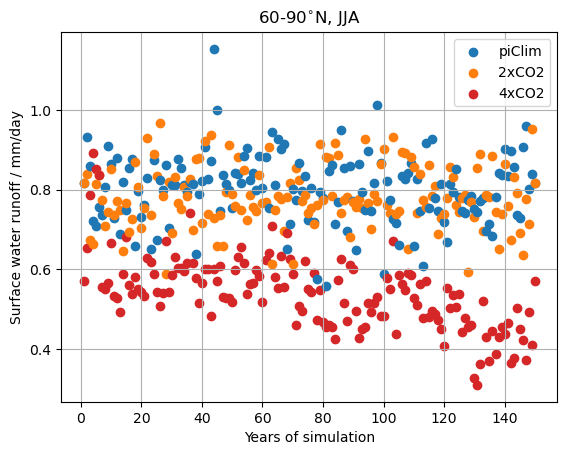

In [34]:
# Make a spatial average
Arctic_lim = 60
var = 'QH2OSFC'
season = 'JJA'

# Choose area
area_weights = ds_piClim['area'].sel(lat=slice(Arctic_lim,90))/ds_piClim['area'].sel(lat=slice(Arctic_lim,90)).sum()
ds_piClim_i = ds_piClim.sel(lat=slice(Arctic_lim,90))
ds_2xCO2_i = ds_2xCO2.sel(lat=slice(Arctic_lim,90))
ds_4xCO2_i = ds_4xCO2.sel(lat=slice(Arctic_lim,90))


# Seasonal averages
ds_piClim_season = ds_piClim_i.sel(time=ds_piClim_i.time.dt.season==season)
ds_piClim_i = ds_piClim_season.groupby(ds_piClim_season.time.dt.year).mean('time')

ds_2xCO2_season = ds_2xCO2_i.sel(time=ds_2xCO2_i.time.dt.season==season)
ds_2xCO2_i = ds_2xCO2_season.groupby(ds_2xCO2_season.time.dt.year).mean('time')

ds_4xCO2_season = ds_4xCO2_i.sel(time=ds_4xCO2_i.time.dt.season==season)
ds_4xCO2_i = ds_4xCO2_season.groupby(ds_4xCO2_season.time.dt.year).mean('time')

import matplotlib.pyplot as plt
plt.scatter(1, (ds_piClim_i[var].isel(year=i)*area_weights).sum()*60*60*24, color='tab:blue', label='piClim')
plt.scatter(1, (ds_2xCO2_i[var].isel(year=i)*area_weights).sum()*60*60*24, color='tab:orange', label='2xCO2')
plt.scatter(1, (ds_4xCO2_i[var].isel(year=i)*area_weights).sum()*60*60*24, color='tab:red', label='4xCO2')

for i in range(1, len(ds_piClim_i.year)):
    plt.scatter(1+i, (ds_piClim_i[var].isel(year=i)*area_weights).sum()*60*60*24, color='tab:blue')
    plt.scatter(1+i, (ds_2xCO2_i[var].isel(year=i)*area_weights).sum()*60*60*24, color='tab:orange')
    plt.scatter(1+i, (ds_4xCO2_i[var].isel(year=i)*area_weights).sum()*60*60*24, color='tab:red')
plt.grid()
plt.legend()
plt.xlabel('Years of simulation')
plt.ylabel('Surface water runoff / mm/day')
plt.title(str(Arctic_lim)+'-90$^{\circ}$N, '+season)
plt.show()

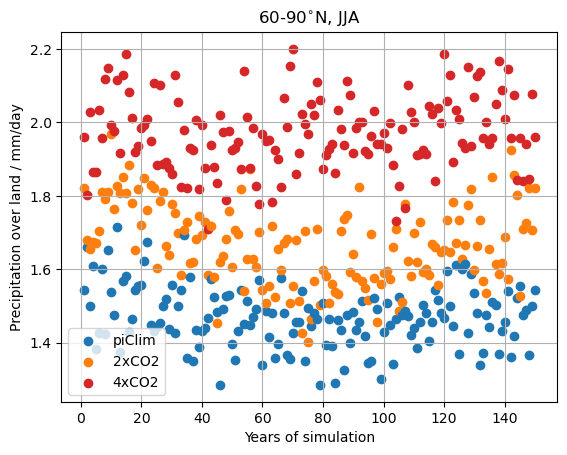

In [35]:
# Make a spatial average
Arctic_lim = 60
var = 'RAIN_FROM_ATM'
season = 'JJA'

# Choose area
area_weights = ds_piClim['area'].sel(lat=slice(Arctic_lim,90))/ds_piClim['area'].sel(lat=slice(Arctic_lim,90)).sum()
ds_piClim_i = ds_piClim.sel(lat=slice(Arctic_lim,90))
ds_2xCO2_i = ds_2xCO2.sel(lat=slice(Arctic_lim,90))
ds_4xCO2_i = ds_4xCO2.sel(lat=slice(Arctic_lim,90))


# Seasonal averages
ds_piClim_season = ds_piClim_i.sel(time=ds_piClim_i.time.dt.season==season)
ds_piClim_i = ds_piClim_season.groupby(ds_piClim_season.time.dt.year).mean('time')

ds_2xCO2_season = ds_2xCO2_i.sel(time=ds_2xCO2_i.time.dt.season==season)
ds_2xCO2_i = ds_2xCO2_season.groupby(ds_2xCO2_season.time.dt.year).mean('time')

ds_4xCO2_season = ds_4xCO2_i.sel(time=ds_4xCO2_i.time.dt.season==season)
ds_4xCO2_i = ds_4xCO2_season.groupby(ds_4xCO2_season.time.dt.year).mean('time')

import matplotlib.pyplot as plt
plt.scatter(1, (ds_piClim_i[var].isel(year=i)*area_weights).sum()*60*60*24, color='tab:blue', label='piClim')
plt.scatter(1, (ds_2xCO2_i[var].isel(year=i)*area_weights).sum()*60*60*24, color='tab:orange', label='2xCO2')
plt.scatter(1, (ds_4xCO2_i[var].isel(year=i)*area_weights).sum()*60*60*24, color='tab:red', label='4xCO2')

for i in range(1, len(ds_piClim_i.year)):
    plt.scatter(1+i, (ds_piClim_i[var].isel(year=i)*area_weights).sum()*60*60*24, color='tab:blue')
    plt.scatter(1+i, (ds_2xCO2_i[var].isel(year=i)*area_weights).sum()*60*60*24, color='tab:orange')
    plt.scatter(1+i, (ds_4xCO2_i[var].isel(year=i)*area_weights).sum()*60*60*24, color='tab:red')
plt.grid()
plt.legend()
plt.xlabel('Years of simulation')
plt.ylabel('Precipitation over land / mm/day')
plt.title(str(Arctic_lim)+'-90$^{\circ}$N, '+season)
plt.show()

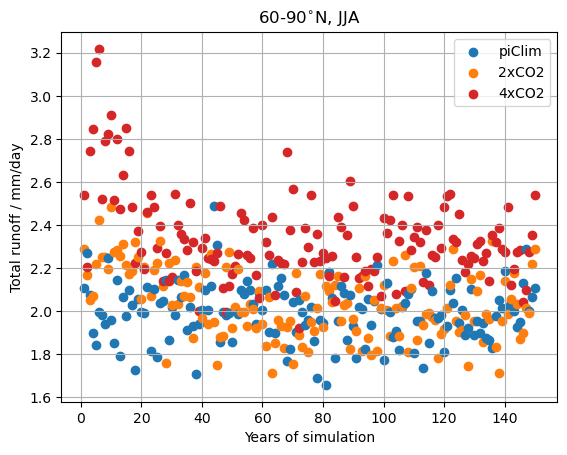

In [47]:
# Make a spatial average
Arctic_lim = 60
var = 'QRUNOFF'
season = 'JJA'

# Choose area
area_weights = ds_piClim['area'].sel(lat=slice(Arctic_lim,90))/ds_piClim['area'].sel(lat=slice(Arctic_lim,90)).sum()
ds_piClim_i = ds_piClim.sel(lat=slice(Arctic_lim,90))
ds_2xCO2_i = ds_2xCO2.sel(lat=slice(Arctic_lim,90))
ds_4xCO2_i = ds_4xCO2.sel(lat=slice(Arctic_lim,90))


# Seasonal averages
ds_piClim_season = ds_piClim_i.sel(time=ds_piClim_i.time.dt.season==season)
ds_piClim_i = ds_piClim_season.groupby(ds_piClim_season.time.dt.year).mean('time')

ds_2xCO2_season = ds_2xCO2_i.sel(time=ds_2xCO2_i.time.dt.season==season)
ds_2xCO2_i = ds_2xCO2_season.groupby(ds_2xCO2_season.time.dt.year).mean('time')

ds_4xCO2_season = ds_4xCO2_i.sel(time=ds_4xCO2_i.time.dt.season==season)
ds_4xCO2_i = ds_4xCO2_season.groupby(ds_4xCO2_season.time.dt.year).mean('time')

import matplotlib.pyplot as plt
plt.scatter(1, (ds_piClim_i[var].isel(year=i)*area_weights).sum()*60*60*24, color='tab:blue', label='piClim')
plt.scatter(1, (ds_2xCO2_i[var].isel(year=i)*area_weights).sum()*60*60*24, color='tab:orange', label='2xCO2')
plt.scatter(1, (ds_4xCO2_i[var].isel(year=i)*area_weights).sum()*60*60*24, color='tab:red', label='4xCO2')

for i in range(1, len(ds_piClim_i.year)):
    plt.scatter(1+i, (ds_piClim_i[var].isel(year=i)*area_weights).sum()*60*60*24, color='tab:blue')
    plt.scatter(1+i, (ds_2xCO2_i[var].isel(year=i)*area_weights).sum()*60*60*24, color='tab:orange')
    plt.scatter(1+i, (ds_4xCO2_i[var].isel(year=i)*area_weights).sum()*60*60*24, color='tab:red')
plt.grid()
plt.legend()
plt.xlabel('Years of simulation')
plt.ylabel('Total runoff / mm/day')
plt.title(str(Arctic_lim)+'-90$^{\circ}$N, '+season)
plt.show()

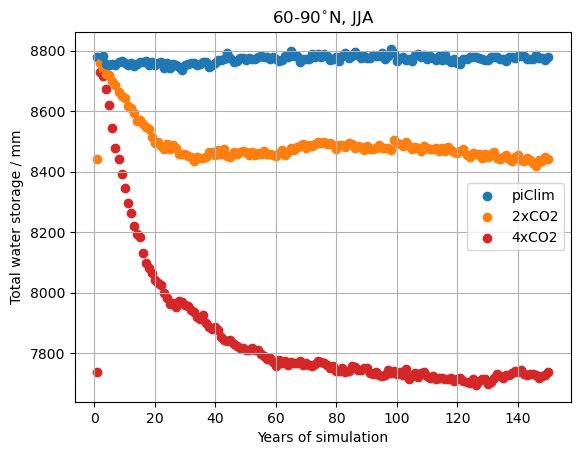

In [42]:
# Make a spatial average
Arctic_lim = 60
var = 'TWS'
season = 'JJA'

# Choose area
area_weights = ds_piClim['area'].sel(lat=slice(Arctic_lim,90))/ds_piClim['area'].sel(lat=slice(Arctic_lim,90)).sum()
ds_piClim_i = ds_piClim.sel(lat=slice(Arctic_lim,90))
ds_2xCO2_i = ds_2xCO2.sel(lat=slice(Arctic_lim,90))
ds_4xCO2_i = ds_4xCO2.sel(lat=slice(Arctic_lim,90))


# Seasonal averages
ds_piClim_season = ds_piClim_i.sel(time=ds_piClim_i.time.dt.season==season)
ds_piClim_i = ds_piClim_season.groupby(ds_piClim_season.time.dt.year).mean('time')

ds_2xCO2_season = ds_2xCO2_i.sel(time=ds_2xCO2_i.time.dt.season==season)
ds_2xCO2_i = ds_2xCO2_season.groupby(ds_2xCO2_season.time.dt.year).mean('time')

ds_4xCO2_season = ds_4xCO2_i.sel(time=ds_4xCO2_i.time.dt.season==season)
ds_4xCO2_i = ds_4xCO2_season.groupby(ds_4xCO2_season.time.dt.year).mean('time')

import matplotlib.pyplot as plt
plt.scatter(1, (ds_piClim_i[var].isel(year=i)*area_weights).sum(), color='tab:blue', label='piClim')
plt.scatter(1, (ds_2xCO2_i[var].isel(year=i)*area_weights).sum(), color='tab:orange', label='2xCO2')
plt.scatter(1, (ds_4xCO2_i[var].isel(year=i)*area_weights).sum(), color='tab:red', label='4xCO2')

for i in range(1, len(ds_piClim_i.year)):
    plt.scatter(1+i, (ds_piClim_i[var].isel(year=i)*area_weights).sum(), color='tab:blue')
    plt.scatter(1+i, (ds_2xCO2_i[var].isel(year=i)*area_weights).sum(), color='tab:orange')
    plt.scatter(1+i, (ds_4xCO2_i[var].isel(year=i)*area_weights).sum(), color='tab:red')
plt.grid()
plt.legend()
plt.xlabel('Years of simulation')
plt.ylabel('Total water storage / mm')
plt.title(str(Arctic_lim)+'-90$^{\circ}$N, '+season)
plt.show()

/tmp/ipykernel_1896348/972287269.py:47: UserWarning: Tight layout not applied. tight_layout cannot make Axes width small enough to accommodate all Axes decorations
  fig.tight_layout()


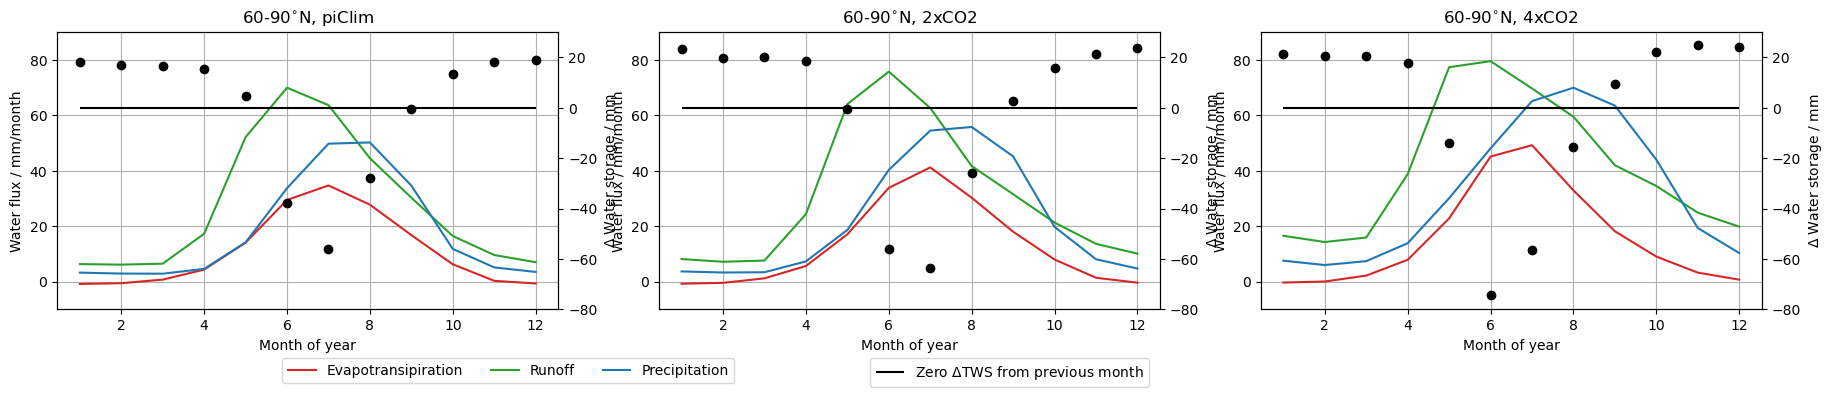

In [41]:
# Make a spatial average
Arctic_lim = 60
tslice = slice('2040-01-01','2060-12-31')

# Choose area
area_weights = ds_piClim['area'].sel(lat=slice(Arctic_lim,90))/ds_piClim['area'].sel(lat=slice(Arctic_lim,90)).sum()
ds_piClim_i = ds_piClim.sel(lat=slice(Arctic_lim,90), time=tslice)
ds_2xCO2_i = ds_2xCO2.sel(lat=slice(Arctic_lim,90), time=tslice)
ds_4xCO2_i = ds_4xCO2.sel(lat=slice(Arctic_lim,90), time=tslice)


# Monthly averages
ds_piClim_i = ds_piClim_i.groupby(ds_piClim_i.time.dt.month).mean('time')
ds_2xCO2_i = ds_2xCO2_i.groupby(ds_2xCO2_i.time.dt.month).mean('time')
ds_4xCO2_i = ds_4xCO2_i.groupby(ds_4xCO2_i.time.dt.month).mean('time')

ds_list = [ds_piClim_i, ds_2xCO2_i, ds_4xCO2_i]
name_list = ['piClim', '2xCO2', '4xCO2']

fig, axes = plt.subplots(1, 3, figsize=[22,4])
for ax, ds, name in zip(axes.flatten(), ds_list, name_list):
    ax2 = ax.twinx()
    ax.plot(ds.month, (ds['QFLX_EVAP_TOT']*area_weights).sum(dim=['lon','lat'])*60*60*24*30, label='Evapotransipiration',color='tab:red')
    ax.plot(ds.month, (ds['QRUNOFF']*area_weights).sum(dim=['lon','lat'])*60*60*24*30, label='Runoff', color='tab:green')
    ax.plot(ds.month, (ds['RAIN_FROM_ATM']*area_weights).sum(dim=['lon','lat'])*60*60*24*30, label='Precipitation',color='tab:blue')
    ax2.scatter(1, (ds['TWS'].isel(month=0)*area_weights).sum(dim=['lon','lat'])-(ds['TWS'].isel(month=11)*area_weights).sum(dim=['lon','lat']),color='black')
    for i in range(1, len(ds.month)):    
        ax2.scatter(1+i, (ds['TWS'].isel(month=i)*area_weights).sum(dim=['lon','lat'])-(ds['TWS'].isel(month=i-1)*area_weights).sum(dim=['lon','lat']), color='black')
    ax.grid()
    ax.set_xlabel('Month of year')
    ax.set_ylabel('Water flux / mm/month')
    ax.set_title(str(Arctic_lim)+'-90$^{\circ}$N, '+name)
    ax.set_ylim([-10,90])
    ax2.set_ylim([-80,30])
    ax2.set_ylabel('$\Delta$ Water storage / mm')
    ax2.hlines(0, 1, 12, color='black', label='Zero $\Delta$TWS from previous month')

    # Shrink current axis's height by 10% on the bottom
    box = ax.get_position()
    ax.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height * 0.9])

# Put a legend below current axis
ax.legend(loc='upper center', bbox_to_anchor=(-1.5, -0.15), ncol=3)
ax2.legend(loc='upper center', bbox_to_anchor=(-0.5, -0.15), ncol=1)

fig.tight_layout()
plt.show()

/tmp/ipykernel_1896348/2530303022.py:48: UserWarning: Tight layout not applied. tight_layout cannot make Axes width small enough to accommodate all Axes decorations
  fig.tight_layout()


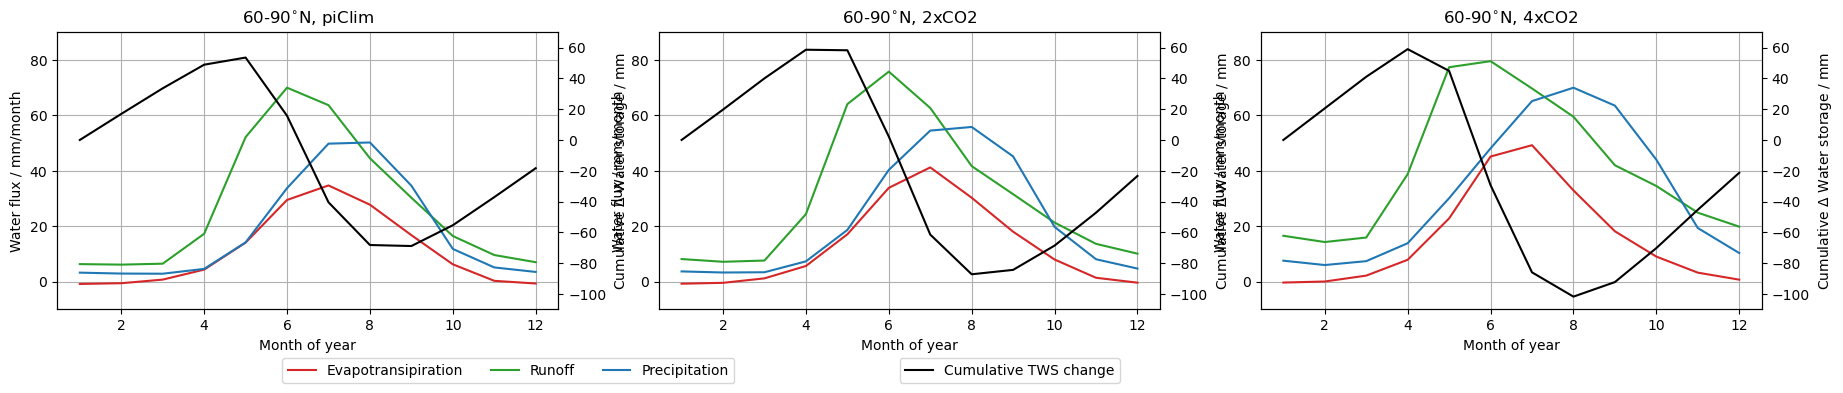

In [44]:
# Make a spatial average
Arctic_lim = 60
tslice = slice('2040-01-01','2060-12-31')

# Choose area
area_weights = ds_piClim['area'].sel(lat=slice(Arctic_lim,90))/ds_piClim['area'].sel(lat=slice(Arctic_lim,90)).sum()
ds_piClim_i = ds_piClim.sel(lat=slice(Arctic_lim,90), time=tslice)
ds_2xCO2_i = ds_2xCO2.sel(lat=slice(Arctic_lim,90), time=tslice)
ds_4xCO2_i = ds_4xCO2.sel(lat=slice(Arctic_lim,90), time=tslice)


# Monthly averages
ds_piClim_i = ds_piClim_i.groupby(ds_piClim_i.time.dt.month).mean('time')
ds_2xCO2_i = ds_2xCO2_i.groupby(ds_2xCO2_i.time.dt.month).mean('time')
ds_4xCO2_i = ds_4xCO2_i.groupby(ds_4xCO2_i.time.dt.month).mean('time')

ds_list = [ds_piClim_i, ds_2xCO2_i, ds_4xCO2_i]
name_list = ['piClim', '2xCO2', '4xCO2']

fig, axes = plt.subplots(1, 3, figsize=[22,4])
for ax, ds, name in zip(axes.flatten(), ds_list, name_list):
    ax2 = ax.twinx()
    ax.plot(ds.month, (ds['QFLX_EVAP_TOT']*area_weights).sum(dim=['lon','lat'])*60*60*24*30, label='Evapotransipiration',color='tab:red')
    ax.plot(ds.month, (ds['QRUNOFF']*area_weights).sum(dim=['lon','lat'])*60*60*24*30, label='Runoff', color='tab:green')
    ax.plot(ds.month, (ds['RAIN_FROM_ATM']*area_weights).sum(dim=['lon','lat'])*60*60*24*30, label='Precipitation',color='tab:blue')
    cum_TWS_change = [0]
    for i in range(1,len(ds.month)):
        monthly_TWS_change = (ds['TWS'].isel(month=i)*area_weights).sum(dim=['lon','lat'])-(ds['TWS'].isel(month=i-1)*area_weights).sum(dim=['lon','lat'])
        cum_TWS_change.append(cum_TWS_change[i-1]+monthly_TWS_change)
    ax2.plot(ds.month, cum_TWS_change, color='black', label='Cumulative TWS change')
    ax.grid()
    ax.set_xlabel('Month of year')
    ax.set_ylabel('Water flux / mm/month')
    ax.set_title(str(Arctic_lim)+'-90$^{\circ}$N, '+name)
    ax.set_ylim([-10,90])
    ax2.set_ylim([-110,70])
    ax2.set_ylabel('Cumulative $\Delta$ Water storage / mm')

    # Shrink current axis's height by 10% on the bottom
    box = ax.get_position()
    ax.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height * 0.9])

# Put a legend below current axis
ax.legend(loc='upper center', bbox_to_anchor=(-1.5, -0.15), ncol=3)
ax2.legend(loc='upper center', bbox_to_anchor=(-0.5, -0.15), ncol=1)

fig.tight_layout()
plt.show()

/tmp/ipykernel_1896348/3833000808.py:44: UserWarning: Tight layout not applied. tight_layout cannot make Axes width small enough to accommodate all Axes decorations
  fig.tight_layout()


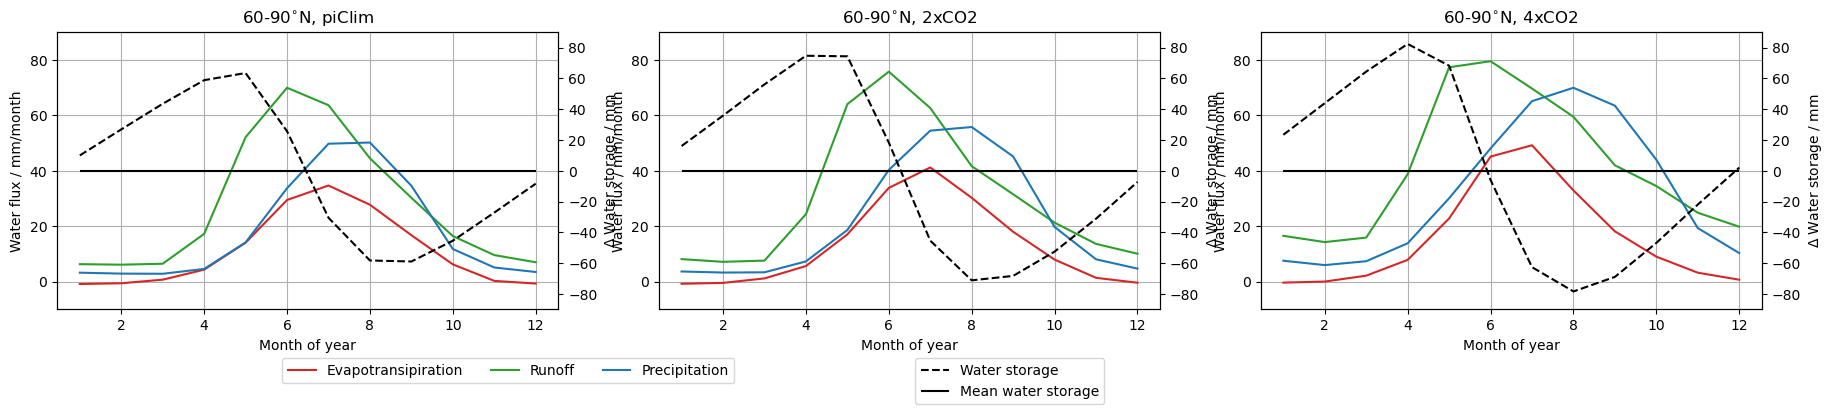

In [39]:
# Make a spatial average
Arctic_lim = 60
tslice = slice('2040-01-01','2060-12-31')

# Choose area
area_weights = ds_piClim['area'].sel(lat=slice(Arctic_lim,90))/ds_piClim['area'].sel(lat=slice(Arctic_lim,90)).sum()
ds_piClim_i = ds_piClim.sel(lat=slice(Arctic_lim,90), time=tslice)
ds_2xCO2_i = ds_2xCO2.sel(lat=slice(Arctic_lim,90), time=tslice)
ds_4xCO2_i = ds_4xCO2.sel(lat=slice(Arctic_lim,90), time=tslice)


# Monthly averages
ds_piClim_i = ds_piClim_i.groupby(ds_piClim_i.time.dt.month).mean('time')
ds_2xCO2_i = ds_2xCO2_i.groupby(ds_2xCO2_i.time.dt.month).mean('time')
ds_4xCO2_i = ds_4xCO2_i.groupby(ds_4xCO2_i.time.dt.month).mean('time')

ds_list = [ds_piClim_i, ds_2xCO2_i, ds_4xCO2_i]
name_list = ['piClim', '2xCO2', '4xCO2']

fig, axes = plt.subplots(1, 3, figsize=[22,4])
for ax, ds, name in zip(axes.flatten(), ds_list, name_list):
    ax2 = ax.twinx()
    ax.plot(ds.month, (ds['QFLX_EVAP_TOT']*area_weights).sum(dim=['lon','lat'])*60*60*24*30, label='Evapotransipiration',color='tab:red')
    ax.plot(ds.month, (ds['QRUNOFF']*area_weights).sum(dim=['lon','lat'])*60*60*24*30, label='Runoff', color='tab:green')
    ax.plot(ds.month, (ds['RAIN_FROM_ATM']*area_weights).sum(dim=['lon','lat'])*60*60*24*30, label='Precipitation',color='tab:blue')   
    ax2.plot(ds.month, (ds['TWS']*area_weights).sum(dim=['lon','lat'])-(ds['TWS']*area_weights).sum(dim=['lon','lat']).mean('month'), label='Water storage', linestyle='--',color='black')
    ax.grid()
    ax.set_xlabel('Month of year')
    ax.set_ylabel('Water flux / mm/month')
    ax.set_title(str(Arctic_lim)+'-90$^{\circ}$N, '+name)
    ax.set_ylim([-10,90])
    ax2.set_ylim([-90,90])
    ax2.set_ylabel('$\Delta$ Water storage / mm')
    ax2.hlines(0, 1, 12, color='black', label='Mean water storage')

    # Shrink current axis's height by 10% on the bottom
    box = ax.get_position()
    ax.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height * 0.9])

# Put a legend below current axis
ax.legend(loc='upper center', bbox_to_anchor=(-1.5, -0.15), ncol=3)
ax2.legend(loc='upper center', bbox_to_anchor=(-0.5, -0.15), ncol=1)
fig.tight_layout()
plt.show()

/tmp/ipykernel_1896348/366009007.py:43: UserWarning: Tight layout not applied. tight_layout cannot make Axes width small enough to accommodate all Axes decorations
  fig.tight_layout()


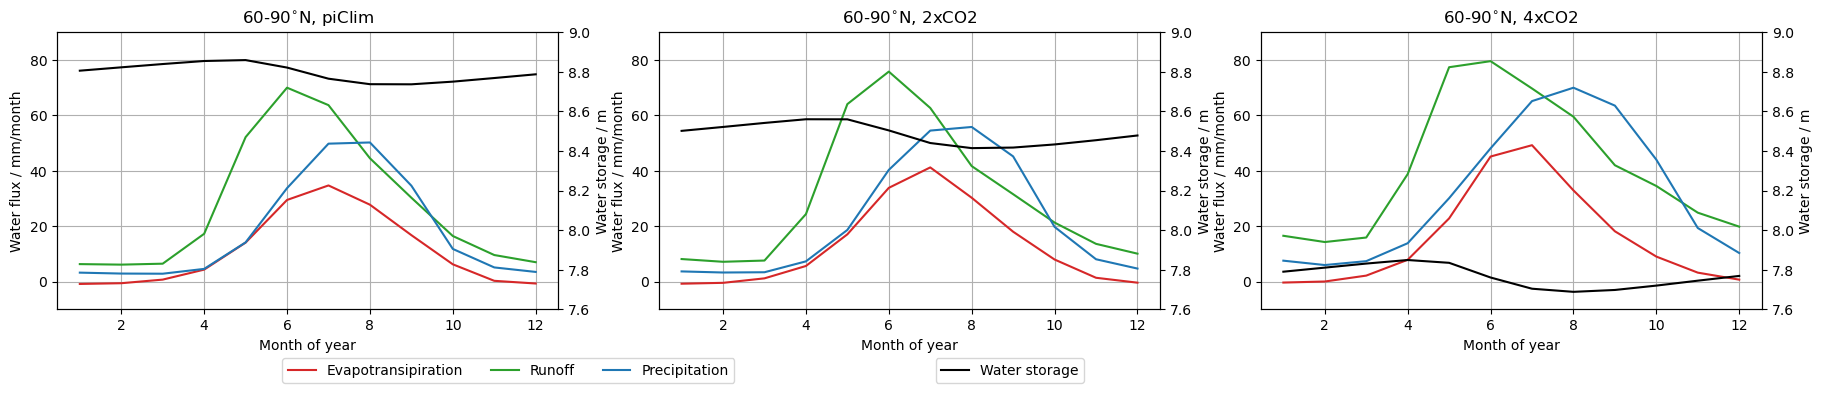

In [38]:
# Make a spatial average
Arctic_lim = 60
tslice = slice('2040-01-01','2060-12-31')

# Choose area
area_weights = ds_piClim['area'].sel(lat=slice(Arctic_lim,90))/ds_piClim['area'].sel(lat=slice(Arctic_lim,90)).sum()
ds_piClim_i = ds_piClim.sel(lat=slice(Arctic_lim,90), time=tslice)
ds_2xCO2_i = ds_2xCO2.sel(lat=slice(Arctic_lim,90), time=tslice)
ds_4xCO2_i = ds_4xCO2.sel(lat=slice(Arctic_lim,90), time=tslice)


# Monthly averages
ds_piClim_i = ds_piClim_i.groupby(ds_piClim_i.time.dt.month).mean('time')
ds_2xCO2_i = ds_2xCO2_i.groupby(ds_2xCO2_i.time.dt.month).mean('time')
ds_4xCO2_i = ds_4xCO2_i.groupby(ds_4xCO2_i.time.dt.month).mean('time')

ds_list = [ds_piClim_i, ds_2xCO2_i, ds_4xCO2_i]
name_list = ['piClim', '2xCO2', '4xCO2']

fig, axes = plt.subplots(1, 3, figsize=[22,4])
for ax, ds, name in zip(axes.flatten(), ds_list, name_list):
    ax2 = ax.twinx()
    ax.plot(ds.month, (ds['QFLX_EVAP_TOT']*area_weights).sum(dim=['lon','lat'])*60*60*24*30, label='Evapotransipiration',color='tab:red')
    ax.plot(ds.month, (ds['QRUNOFF']*area_weights).sum(dim=['lon','lat'])*60*60*24*30, label='Runoff', color='tab:green')
    ax.plot(ds.month, (ds['RAIN_FROM_ATM']*area_weights).sum(dim=['lon','lat'])*60*60*24*30, label='Precipitation',color='tab:blue')   
    ax2.plot(ds.month, (ds['TWS']*area_weights).sum(dim=['lon','lat'])/1000, label='Water storage',color='black')
    ax.grid()
    ax.set_xlabel('Month of year')
    ax.set_ylabel('Water flux / mm/month')
    ax.set_title(str(Arctic_lim)+'-90$^{\circ}$N, '+name)
    ax.set_ylim([-10,90])
    ax2.set_ylim([7.6,9])
    ax2.set_ylabel('Water storage / m')

    # Shrink current axis's height by 10% on the bottom
    box = ax.get_position()
    ax.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height * 0.9])

# Put a legend below current axis
ax.legend(loc='upper center', bbox_to_anchor=(-1.5, -0.15), ncol=3)
ax2.legend(loc='upper center', bbox_to_anchor=(-0.5, -0.15), ncol=1)
fig.tight_layout()
plt.show()

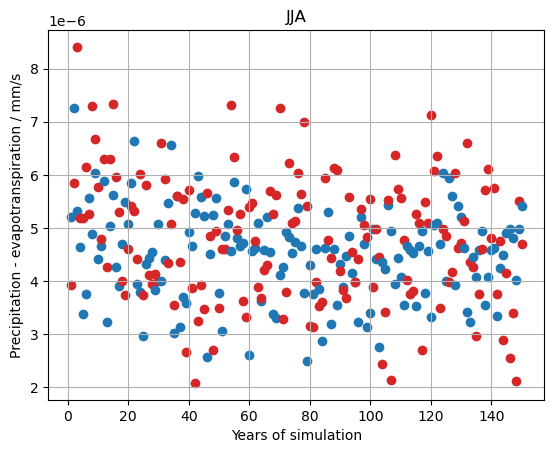

In [38]:
# HYDROLOGICAL BALANCE

# Make a spatial average
Arctic_lim = 60
season = 'JJA'

# Choose area (NB! EXCLUDING GREENLAND!)
area_weights = ds_piClim['area'].sel(lat=slice(Arctic_lim,90))/ds_piClim['area'].sel(lat=slice(Arctic_lim,90)).sum()
ds_piClim_i = ds_piClim.sel(lat=slice(Arctic_lim,90), lon=slice(0,290))
ds_2xCO2_i = ds_2xCO2.sel(lat=slice(Arctic_lim,90), lon=slice(0,290))
ds_4xCO2_i = ds_4xCO2.sel(lat=slice(Arctic_lim,90), lon=slice(0,290))


# Seasonal averages
ds_piClim_season = ds_piClim_i.sel(time=ds_piClim_i.time.dt.season==season)
ds_piClim_i = ds_piClim_season.groupby(ds_piClim_season.time.dt.year).mean('time')

ds_4xCO2_season = ds_4xCO2_i.sel(time=ds_4xCO2_i.time.dt.season==season)
ds_4xCO2_i = ds_4xCO2_season.groupby(ds_4xCO2_season.time.dt.year).mean('time')

import matplotlib.pyplot as plt

for i in range(len(ds_piClim_i.year)):
  #  plt.scatter(1+i, ((ds_piClim_i['RAIN_FROM_ATM'].isel(year=i) - ds_piClim_i['QH2OSFC'].isel(year=i) - ds_piClim_i['QFLX_EVAP_TOT'].isel(year=i))*area_weights).sum(), color='tab:blue')
  #  plt.scatter(1+i, ((ds_4xCO2_i['RAIN_FROM_ATM'].isel(year=i) - ds_4xCO2_i['QH2OSFC'].isel(year=i) - ds_4xCO2_i['QFLX_EVAP_TOT'].isel(year=i))*area_weights).sum(), color='tab:red')
    plt.scatter(1+i, ((ds_piClim_i['RAIN_FROM_ATM'].isel(year=i) - ds_piClim_i['QFLX_EVAP_TOT'].isel(year=i))*area_weights).sum(), color='tab:blue')
    plt.scatter(1+i, ((ds_4xCO2_i['RAIN_FROM_ATM'].isel(year=i) - ds_4xCO2_i['QFLX_EVAP_TOT'].isel(year=i))*area_weights).sum(), color='tab:red')

plt.grid()
plt.xlabel('Years of simulation')
plt.ylabel('Precipitation - evapotranspiration / mm/s')
plt.title(season)
plt.show()

In [12]:
ds_piClim['QH2OSFC']

<xarray.DataArray 'QH2OSFC' (time: 1800, lat: 96, lon: 144)> Size: 199MB
[24883200 values with dtype=float64]
Coordinates:
  * lon      (lon) float64 1kB 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * lat      (lat) float64 768B -90.0 -88.11 -86.21 -84.32 ... 86.21 88.11 90.0
  * time     (time) object 14kB 1920-01-15 00:00:00 ... 2069-12-15 00:00:00
Attributes:
    long_name:     surface water runoff
    units:         mm/s
    cell_methods:  time: mean

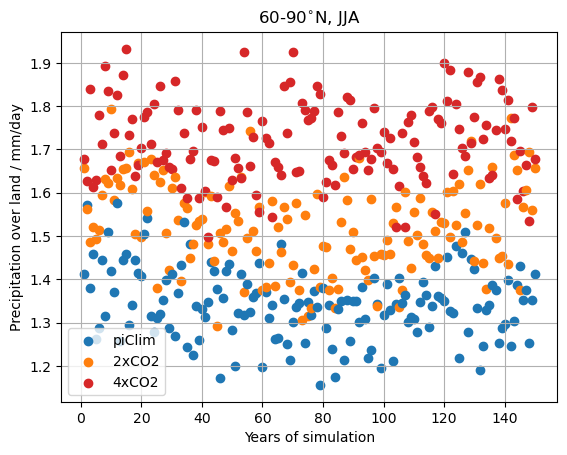

In [36]:
# Make a spatial average
Arctic_lim = 60
var = 'RAIN_FROM_ATM'
season = 'JJA'

# Choose area (NB! EXCLUDING GREENLAND!)
area_weights = ds_piClim['area'].sel(lat=slice(Arctic_lim,90))/ds_piClim['area'].sel(lat=slice(Arctic_lim,90)).sum()
ds_piClim_i = ds_piClim.sel(lat=slice(Arctic_lim,90), lon=slice(0,290))
ds_2xCO2_i = ds_2xCO2.sel(lat=slice(Arctic_lim,90), lon=slice(0,290))
ds_4xCO2_i = ds_4xCO2.sel(lat=slice(Arctic_lim,90), lon=slice(0,290))


# Seasonal averages
ds_piClim_season = ds_piClim_i.sel(time=ds_piClim_i.time.dt.season==season)
ds_piClim_i = ds_piClim_season.groupby(ds_piClim_season.time.dt.year).mean('time')

ds_2xCO2_season = ds_2xCO2_i.sel(time=ds_2xCO2_i.time.dt.season==season)
ds_2xCO2_i = ds_2xCO2_season.groupby(ds_2xCO2_season.time.dt.year).mean('time')

ds_4xCO2_season = ds_4xCO2_i.sel(time=ds_4xCO2_i.time.dt.season==season)
ds_4xCO2_i = ds_4xCO2_season.groupby(ds_4xCO2_season.time.dt.year).mean('time')

import matplotlib.pyplot as plt
plt.scatter(1, (ds_piClim_i[var].isel(year=i)*area_weights).sum()*60*60*24, color='tab:blue', label='piClim')
plt.scatter(1, (ds_2xCO2_i[var].isel(year=i)*area_weights).sum()*60*60*24, color='tab:orange', label='2xCO2')
plt.scatter(1, (ds_4xCO2_i[var].isel(year=i)*area_weights).sum()*60*60*24, color='tab:red', label='4xCO2')

for i in range(1, len(ds_piClim_i.year)):
    plt.scatter(1+i, (ds_piClim_i[var].isel(year=i)*area_weights).sum()*60*60*24, color='tab:blue')
    plt.scatter(1+i, (ds_2xCO2_i[var].isel(year=i)*area_weights).sum()*60*60*24, color='tab:orange')
    plt.scatter(1+i, (ds_4xCO2_i[var].isel(year=i)*area_weights).sum()*60*60*24, color='tab:red')
plt.grid()
plt.legend()
plt.xlabel('Years of simulation')
plt.ylabel('Precipitation over land / mm/day')
plt.title(str(Arctic_lim)+'-90$^{\circ}$N, '+season)
plt.show()

Text(0.5, 0, 'kg/m$^2$')

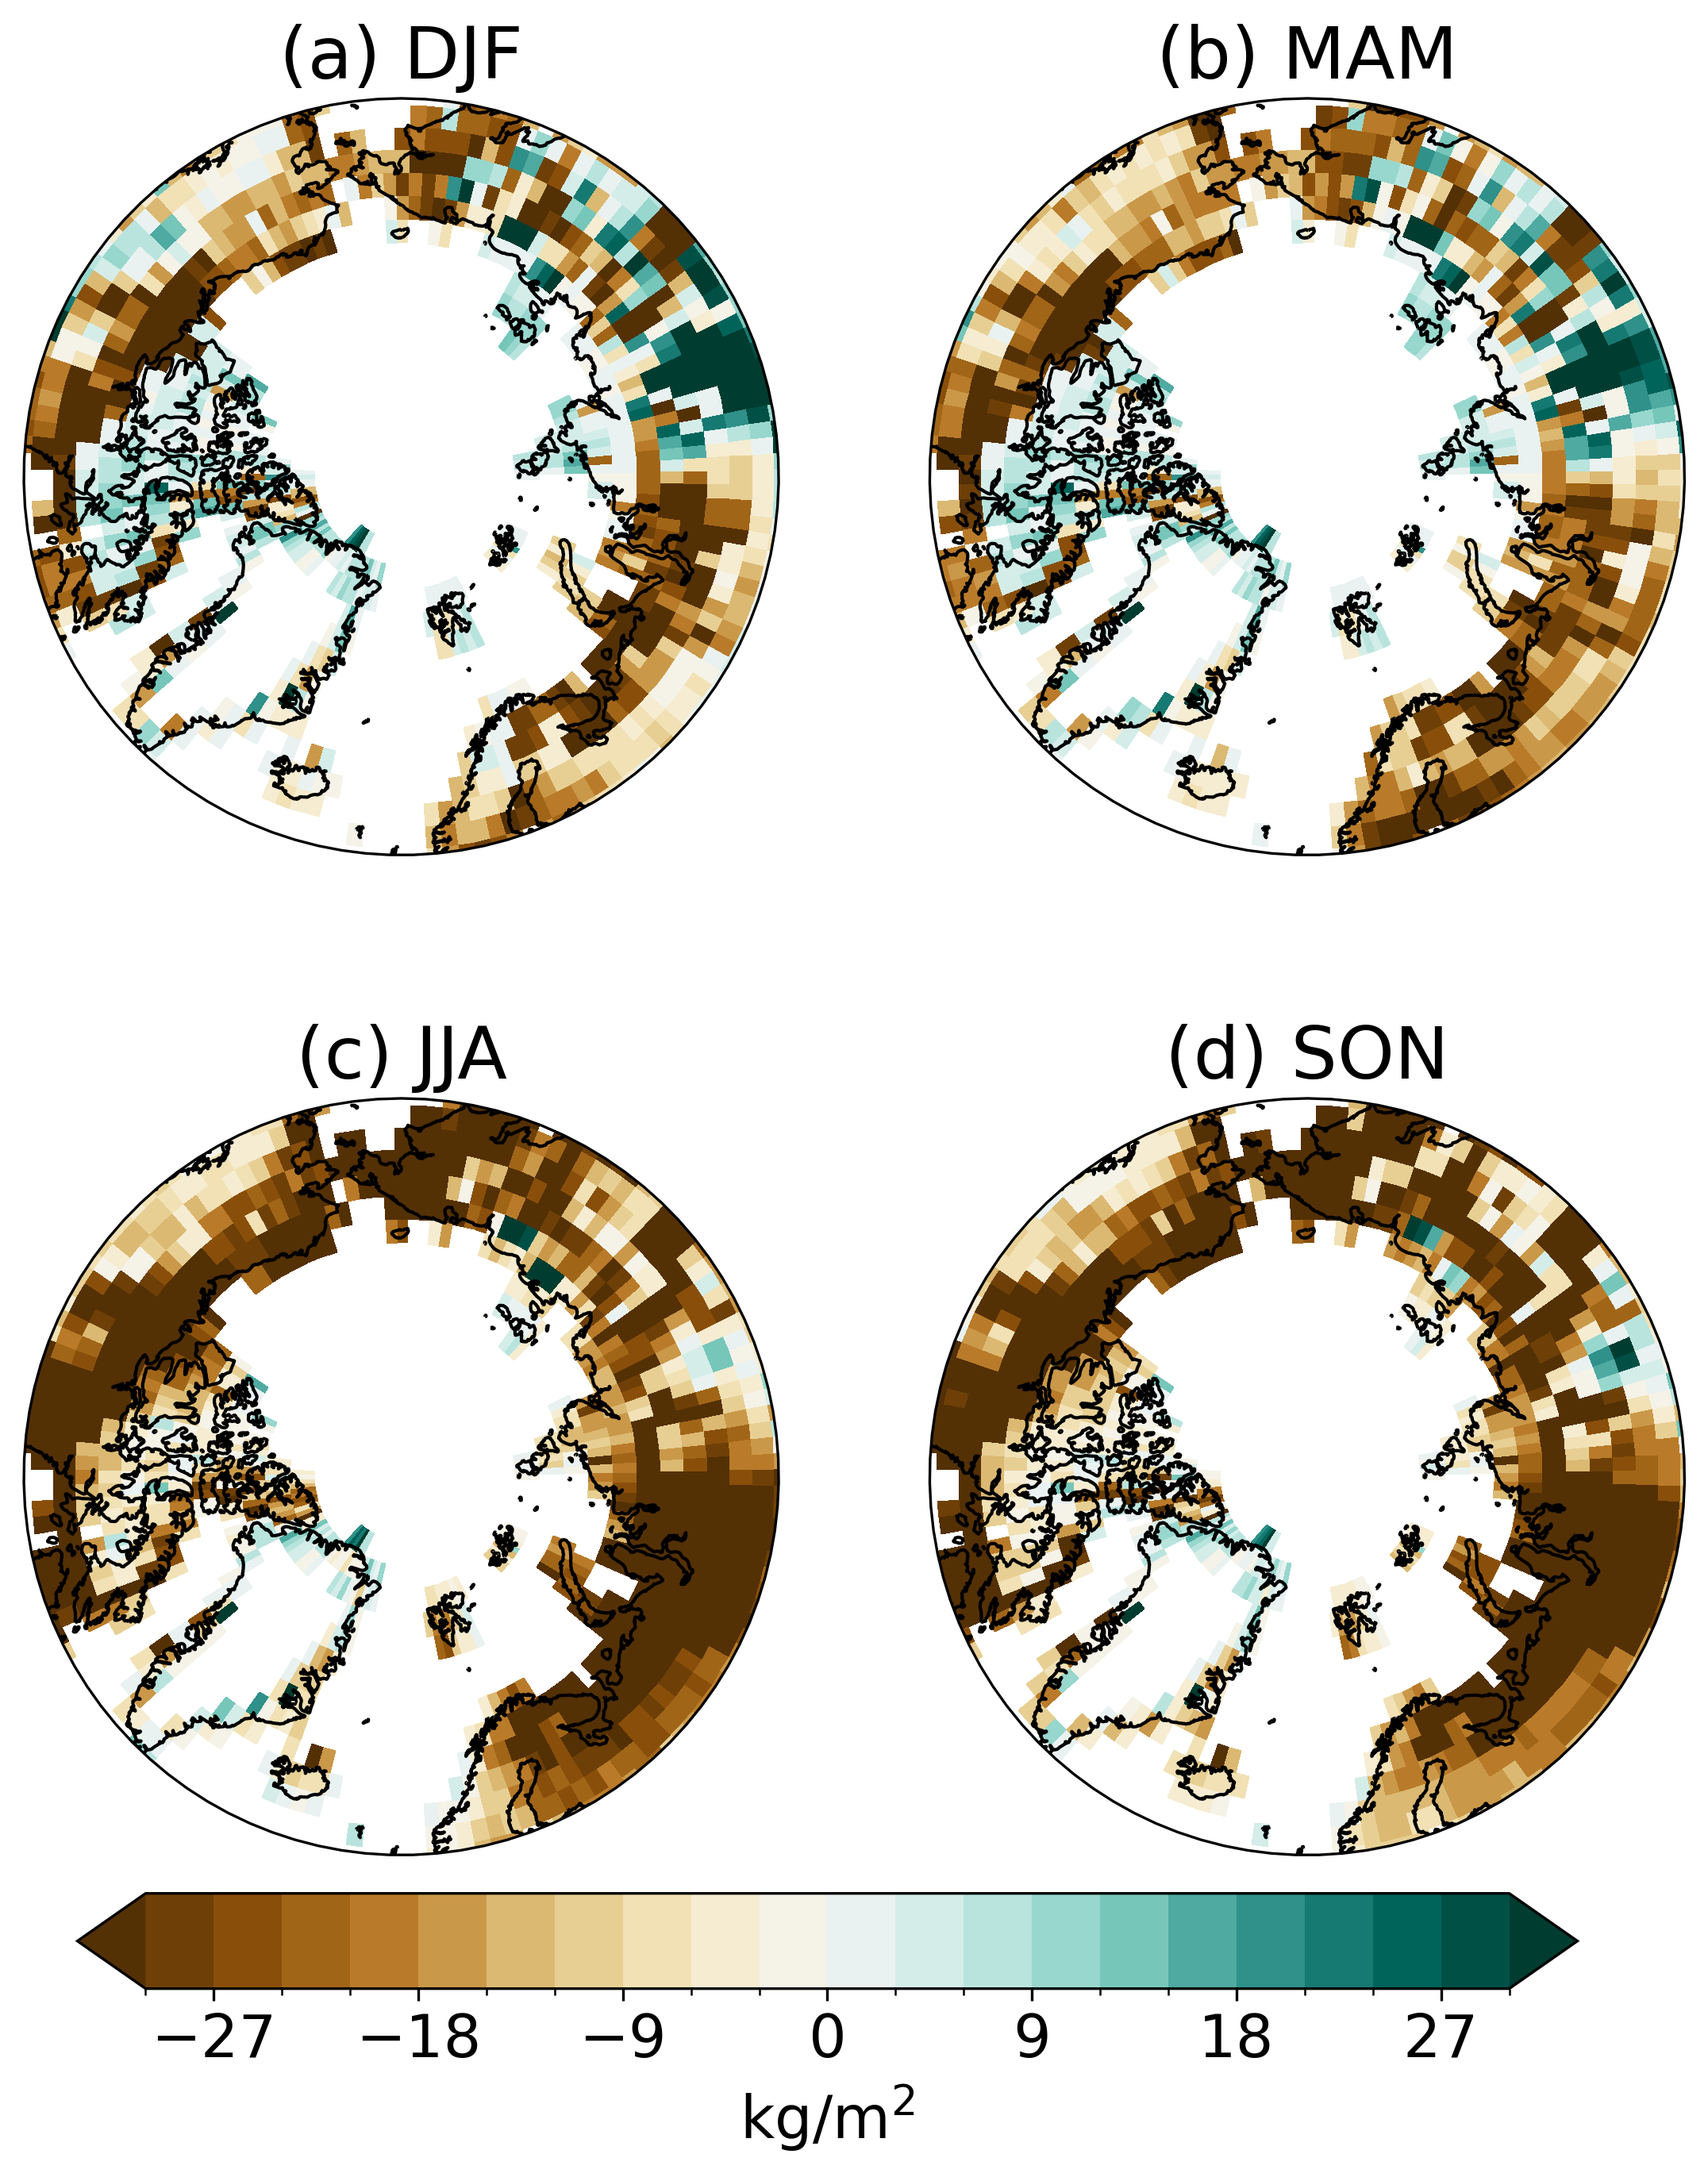

In [37]:
var = 'SOILWATER_10CM'
lim = 30
levels = np.linspace(-lim, lim, 21)
timeslice = slice('2040-01-01', '2069-12-31')

import cartopy.crs as ccrs
fig = plt.figure(1, figsize=[9,10],dpi=300)

# Set the projection to use for plotting
ax1 = plt.subplot(2, 2, 1, projection=ccrs.Orthographic(0, 90))
ax2 = plt.subplot(2, 2, 2, projection=ccrs.Orthographic(0, 90))
ax3 = plt.subplot(2, 2, 3, projection=ccrs.Orthographic(0, 90))
ax4 = plt.subplot(2, 2, 4, projection=ccrs.Orthographic(0, 90))
#plt.subplots_adjust(top=0.85)

piClim_s = ds_piClim.sel(time=timeslice).groupby('time.season').mean('time')
ds_s = ds_4xCO2.sel(time=timeslice).groupby('time.season').mean('time')

for ax,season,label in zip([ax1, ax2, ax3, ax4], ["DJF", "MAM","JJA","SON"], ["(a)", "(b)", "(c)", "(d)"]):
    
    functions.polarCentral_set_latlim([60,90], ax)
    data = ds_s[var].sel(season=season) - piClim_s[var].sel(season=season)
    data = data/piClim_s[var].sel(season=season)*100
    map = data.plot.pcolormesh(ax=ax, transform=ccrs.PlateCarree(), 
                                        cmap='BrBG', levels=levels,
                                        add_colorbar=False)
    ax.set_title(label+" "+season, fontsize=22)
    ax.coastlines()


cb_ax = fig.add_axes([0.15, 0.07, 0.7, 0.04])

cbar = plt.colorbar(map, cax=cb_ax, spacing = 'uniform', extend='both', orientation='horizontal', fraction=0.046, pad=0.06)
cbar.ax.tick_params(labelsize=18)
cbar.ax.set_xlabel('kg/m$^2$', fontsize=18)

Text(0.5, 0, 'mm/day')

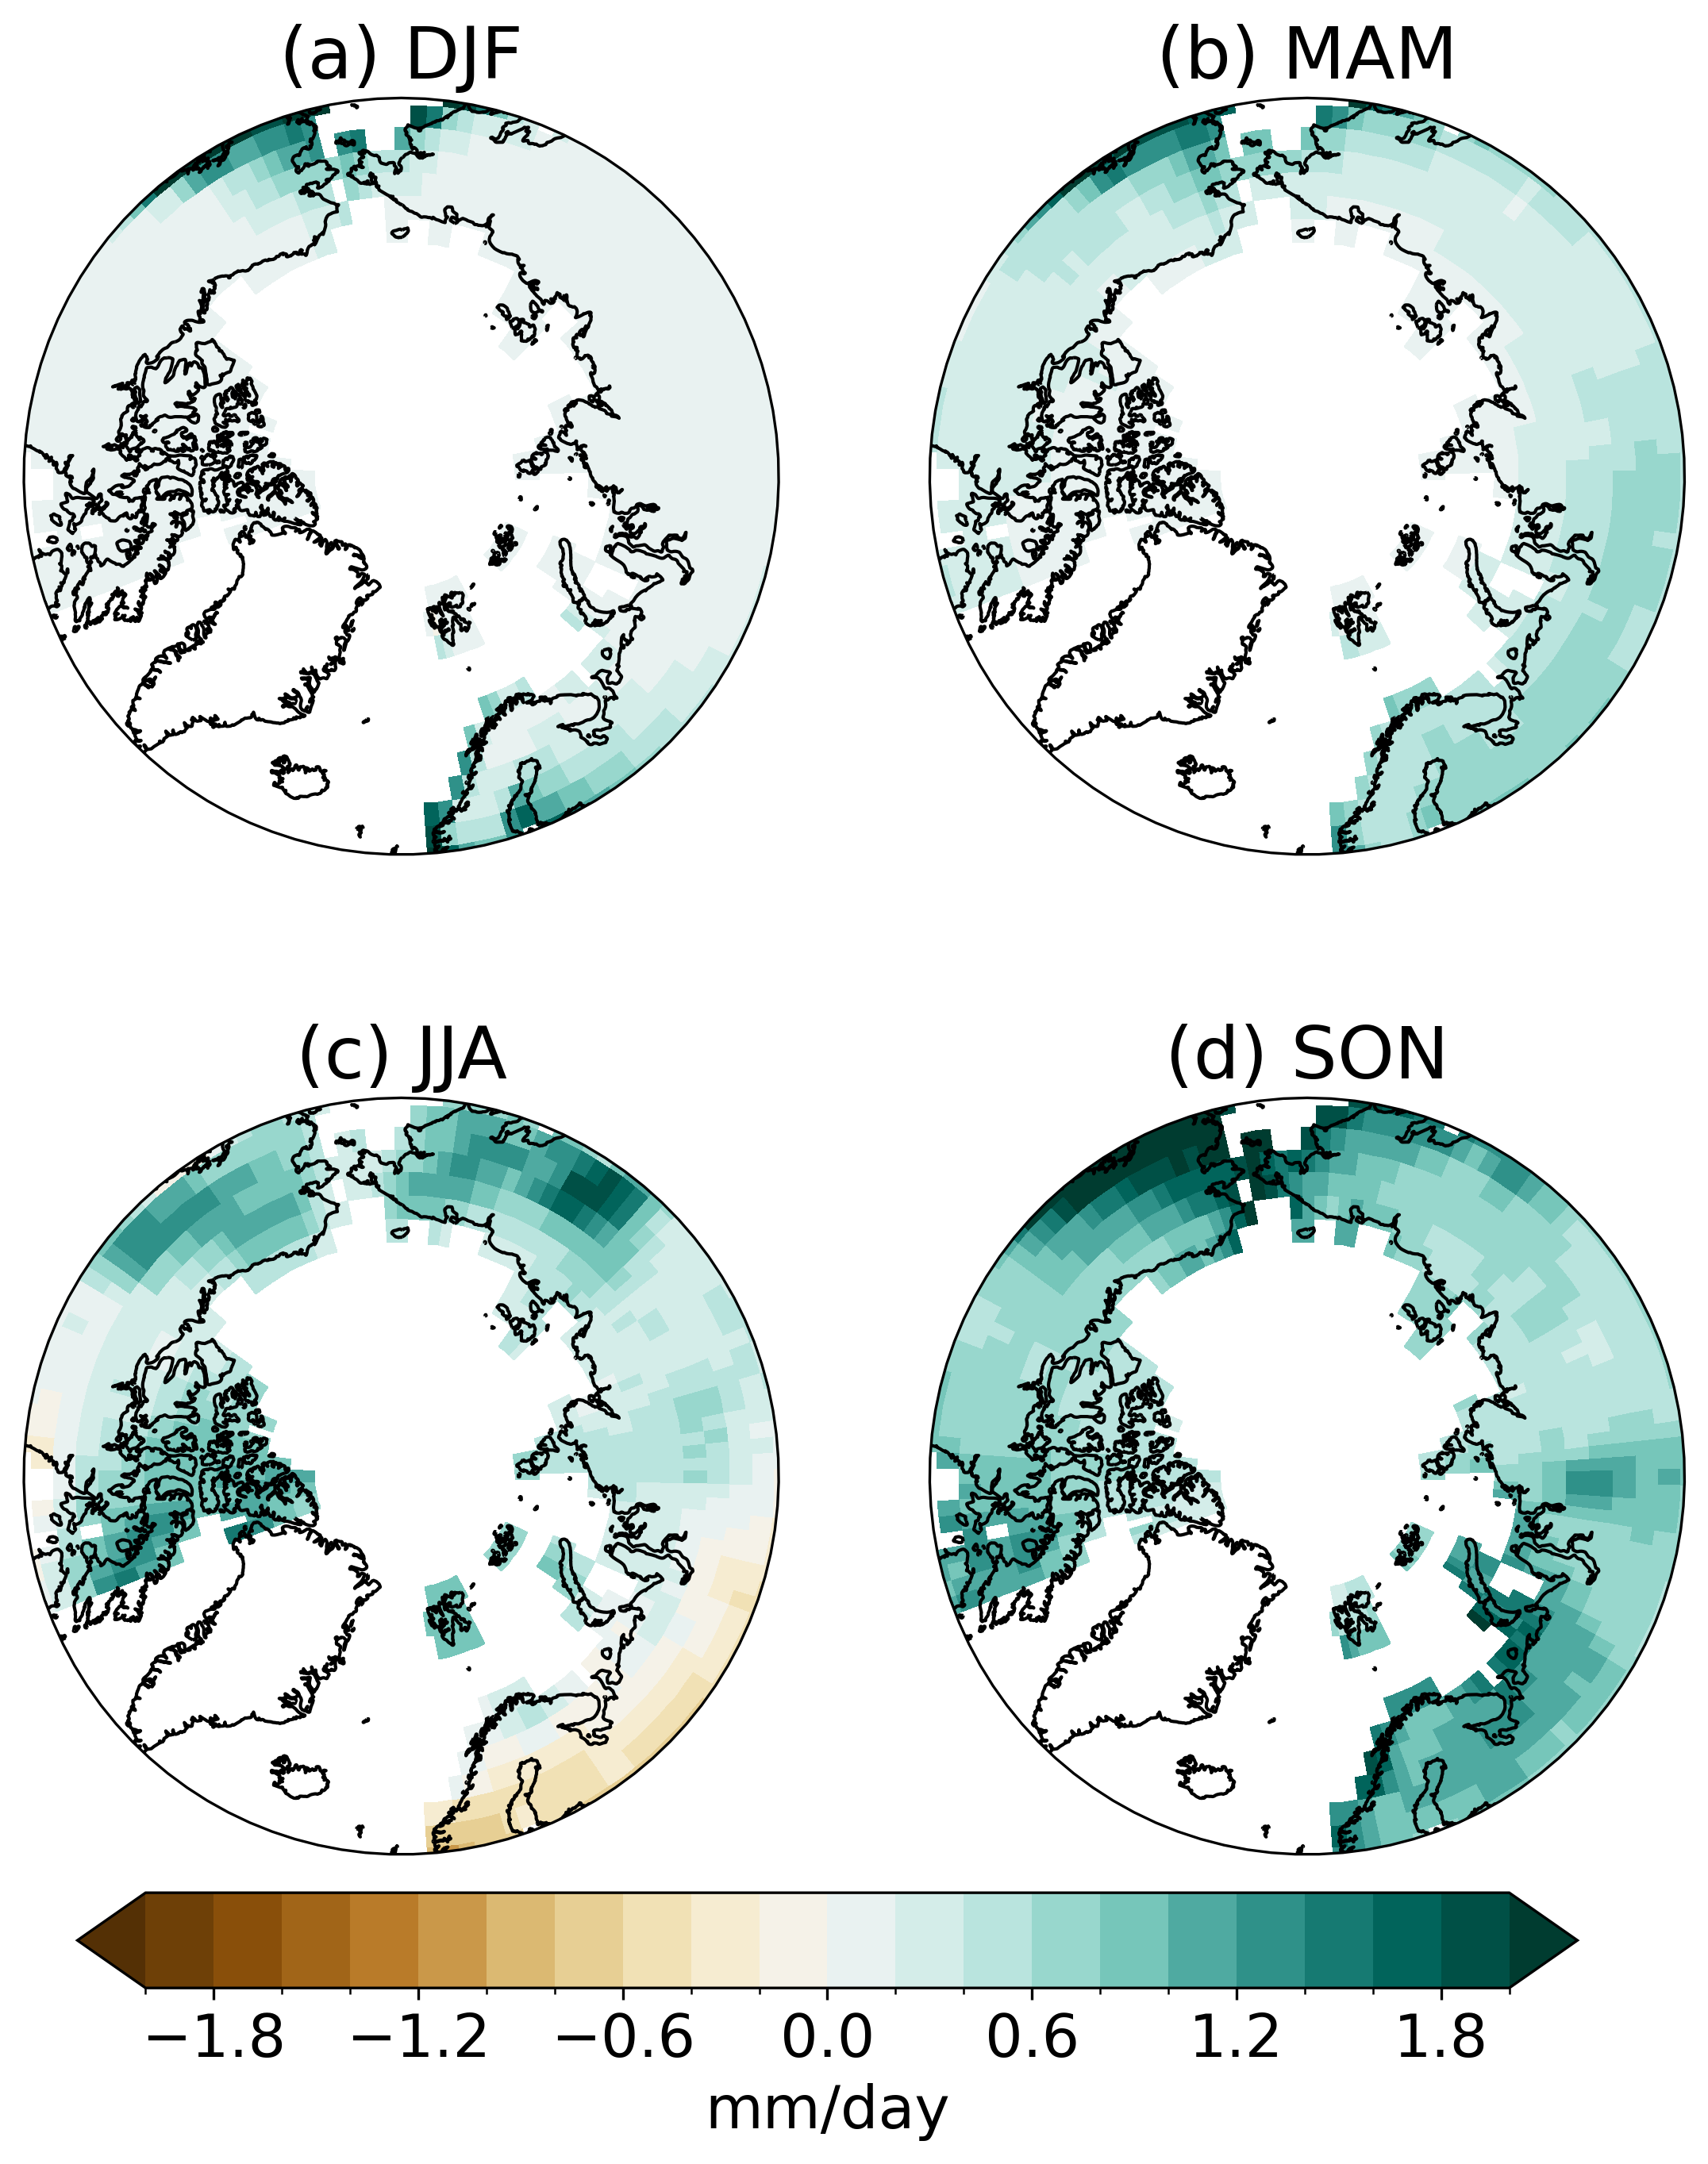

In [39]:
var = 'RAIN_FROM_ATM'
lim = 2
levels = np.linspace(-lim, lim, 21)
timeslice = slice('2040-01-01', '2069-12-31')

import cartopy.crs as ccrs
fig = plt.figure(1, figsize=[9,10],dpi=300)

# Set the projection to use for plotting
ax1 = plt.subplot(2, 2, 1, projection=ccrs.Orthographic(0, 90))
ax2 = plt.subplot(2, 2, 2, projection=ccrs.Orthographic(0, 90))
ax3 = plt.subplot(2, 2, 3, projection=ccrs.Orthographic(0, 90))
ax4 = plt.subplot(2, 2, 4, projection=ccrs.Orthographic(0, 90))
#plt.subplots_adjust(top=0.85)

piClim_s = ds_piClim.sel(time=timeslice).groupby('time.season').mean('time')
ds_s = ds_4xCO2.sel(time=timeslice).groupby('time.season').mean('time')

for ax,season,label in zip([ax1, ax2, ax3, ax4], ["DJF", "MAM","JJA","SON"], ["(a)", "(b)", "(c)", "(d)"]):
    
    functions.polarCentral_set_latlim([60,90], ax)
    data = ds_s[var].sel(season=season, lon=slice(0,290)) - piClim_s[var].sel(season=season, lon=slice(0,290))
    data = data * 60 * 60 * 24
    map = data.plot.pcolormesh(ax=ax, transform=ccrs.PlateCarree(), 
                                        cmap='BrBG', levels=levels,
                                        add_colorbar=False)
    ax.set_title(label+" "+season, fontsize=22)
    ax.coastlines()


cb_ax = fig.add_axes([0.15, 0.07, 0.7, 0.04])

cbar = plt.colorbar(map, cax=cb_ax, spacing = 'uniform', extend='both', orientation='horizontal', fraction=0.046, pad=0.06)
cbar.ax.tick_params(labelsize=18)
cbar.ax.set_xlabel('mm/day', fontsize=18)

Text(0.5, 0, 'mm/day')

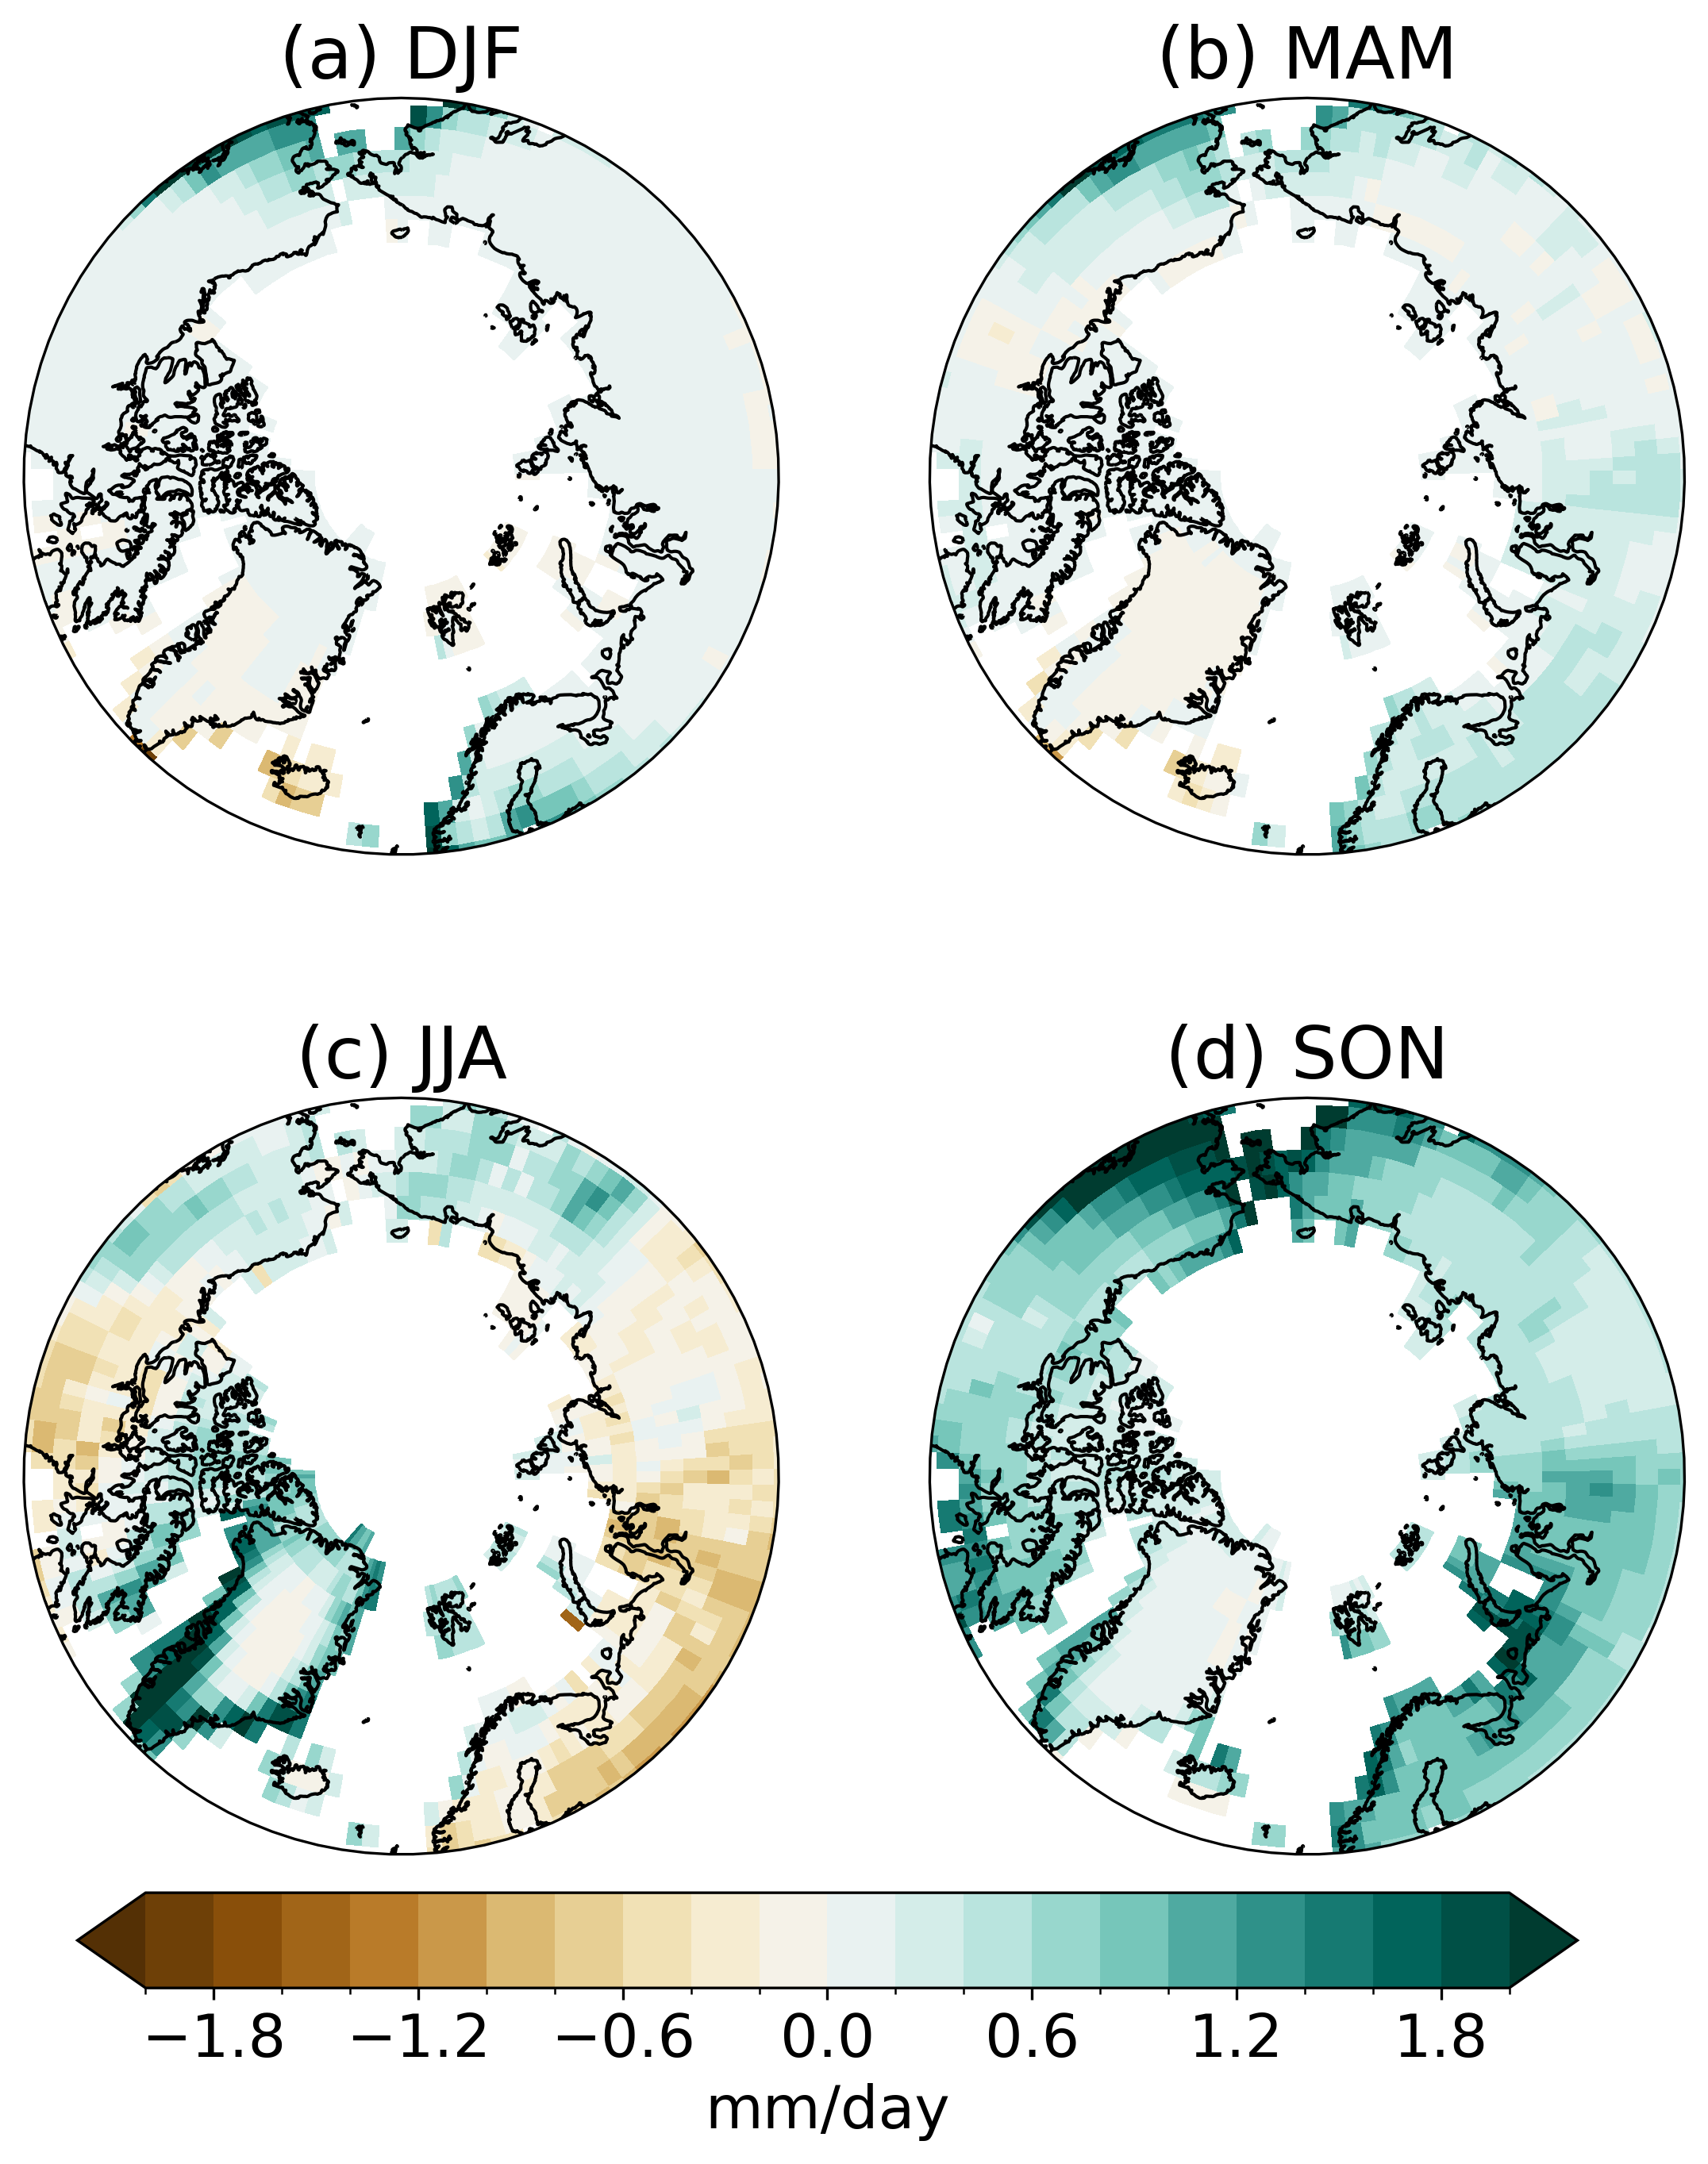

In [29]:
# Precipitation minus evapotranspiration
lim = 2
levels = np.linspace(-lim, lim, 21)
timeslice = slice('2040-01-01', '2069-12-31')

import cartopy.crs as ccrs
fig = plt.figure(1, figsize=[9,10],dpi=300)

# Set the projection to use for plotting
ax1 = plt.subplot(2, 2, 1, projection=ccrs.Orthographic(0, 90))
ax2 = plt.subplot(2, 2, 2, projection=ccrs.Orthographic(0, 90))
ax3 = plt.subplot(2, 2, 3, projection=ccrs.Orthographic(0, 90))
ax4 = plt.subplot(2, 2, 4, projection=ccrs.Orthographic(0, 90))
#plt.subplots_adjust(top=0.85)

piClim_s = ds_piClim.sel(time=timeslice).groupby('time.season').mean('time')
ds_s = ds_4xCO2.sel(time=timeslice).groupby('time.season').mean('time')

for ax,season,label in zip([ax1, ax2, ax3, ax4], ["DJF", "MAM","JJA","SON"], ["(a)", "(b)", "(c)", "(d)"]):
    
    functions.polarCentral_set_latlim([60,90], ax)
   # data = ds_s['RAIN_FROM_ATM'].sel(season=season) - ds_s['QFLX_EVAP_TOT'].sel(season=season) - ds_s['QH2OSFC'].sel(season=season)- piClim_s['RAIN_FROM_ATM'].sel(season=season) + piClim_s['QFLX_EVAP_TOT'].sel(season=season) + piClim_s['QH2OSFC'].sel(season=season)
    data = ds_s['RAIN_FROM_ATM'].sel(season=season) - ds_s['QFLX_EVAP_TOT'].sel(season=season)- piClim_s['RAIN_FROM_ATM'].sel(season=season) + piClim_s['QFLX_EVAP_TOT'].sel(season=season)

    data = data * 60 * 60 * 24
    map = data.plot.pcolormesh(ax=ax, transform=ccrs.PlateCarree(), 
                                        cmap='BrBG', levels=levels,
                                        add_colorbar=False)
    ax.set_title(label+" "+season, fontsize=22)
    ax.coastlines()


cb_ax = fig.add_axes([0.15, 0.07, 0.7, 0.04])

cbar = plt.colorbar(map, cax=cb_ax, spacing = 'uniform', extend='both', orientation='horizontal', fraction=0.046, pad=0.06)
cbar.ax.tick_params(labelsize=18)
cbar.ax.set_xlabel('mm/day', fontsize=18)

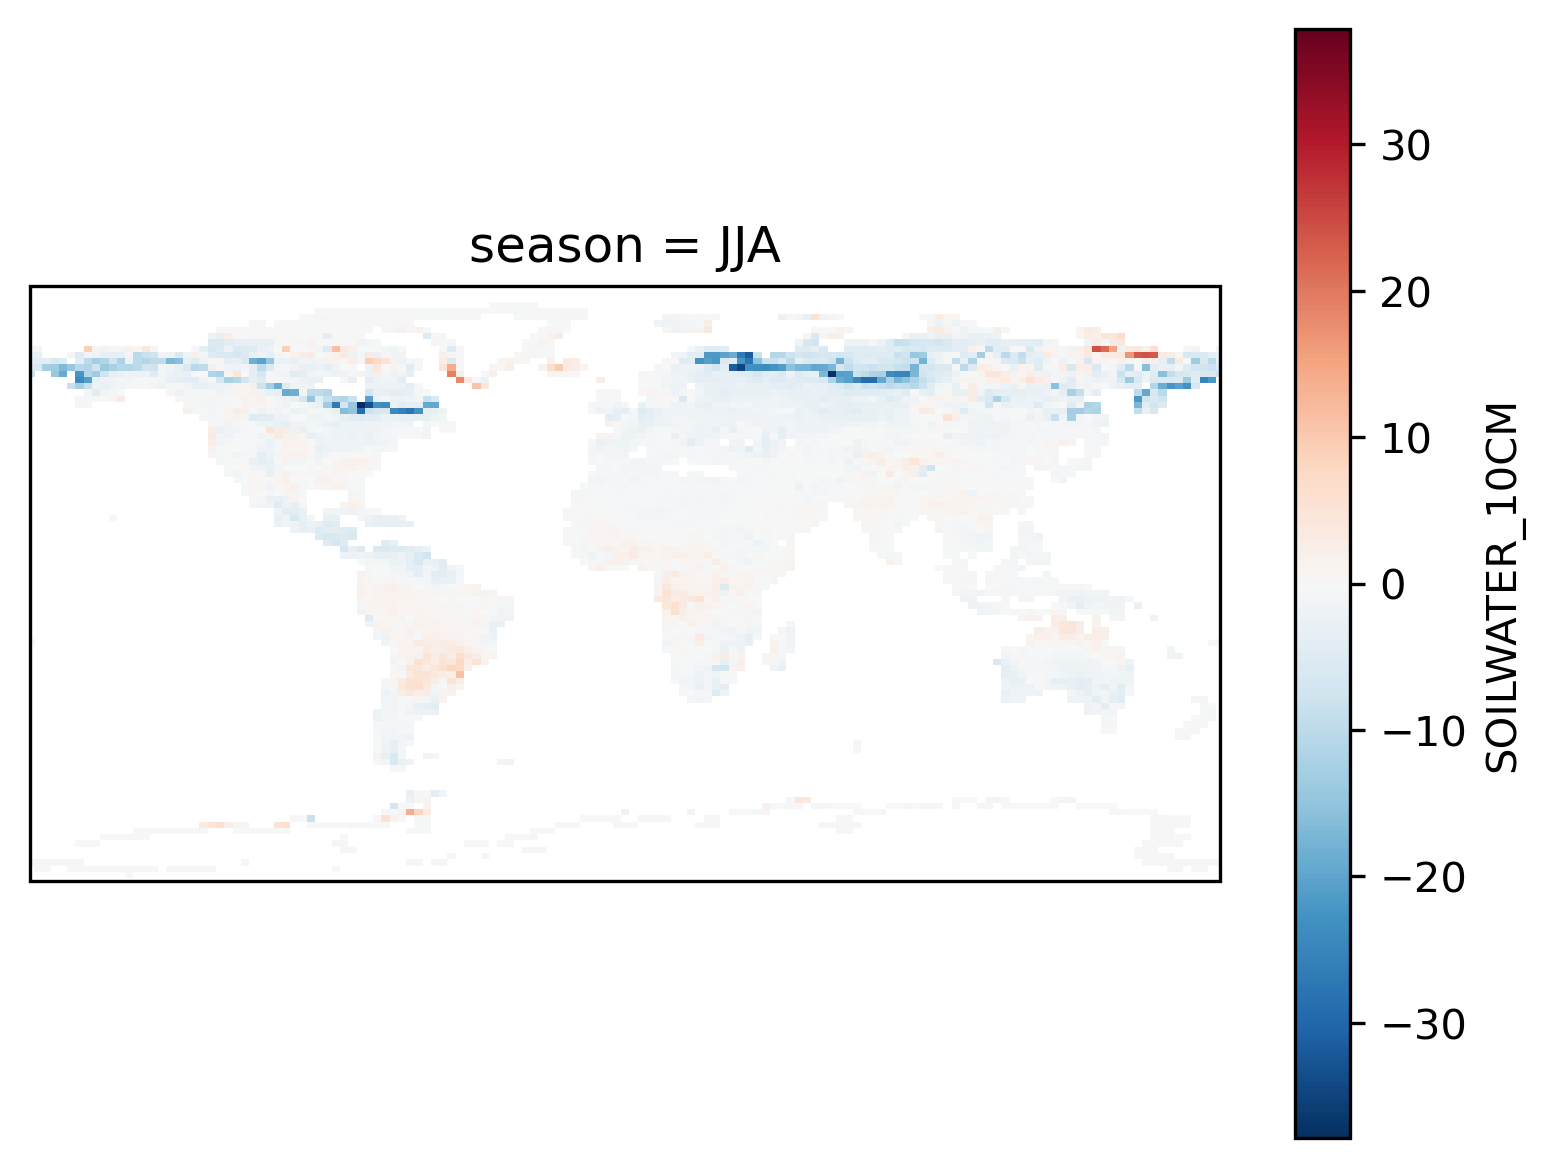

In [91]:
var = 'SOILWATER_10CM'
lim = 30
levels = np.linspace(-lim, lim, 21)
timeslice = slice('2040-01-01', '2069-12-31')

import cartopy.crs as ccrs
fig = plt.figure(1, dpi=300)

# Set the projection to use for plotting
ax1 = plt.subplot(1, 1, 1, projection=ccrs.PlateCarree())
#plt.subplots_adjust(top=0.85)

piClim_s = ds_piClim.sel(time=timeslice).groupby('time.season').mean('time')
ds_s = ds_2xCO2.sel(time=timeslice).groupby('time.season').mean('time')

(ds_s[var].sel(season='JJA') - piClim_s[var].sel(season=season)).plot()